# 1. Problem Statement - TSF Project


As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

Objective
The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

# 1.1 Define the problem and perform Exploratory Data Analysis

## 1.1.1 Importing the necessary libraries 

In [1]:
#### To help with reading and manipulating data
import pandas as pd
import numpy as np

#### To help with data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels
import sklearn

#### To display multiple dataframes from one cell
from IPython.display import display

#### To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#### To build a logistic regression model
from sklearn.linear_model import LinearRegression

#### To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

##### To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

####  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


#### To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

#### To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Seaborn version:',sns.__version__)
print('Statsmodels version:',statsmodels.__version__)
print('Sci-kit learn version:',sklearn.__version__)

Numpy version: 1.24.3
Pandas version: 1.5.3
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Statsmodels version: 0.13.5
Sci-kit learn version: 1.2.2


## 1.1.2 Reading and Loading the data

In [3]:
import os
os.getcwd()

'C:\\Users\\ramas\\Great Learning\\MONTH 8 - TIME SERIES FORECASTING'

In [4]:
df=pd.read_csv('C:\\Users\\ramas\\Great Learning\\MONTH 8 - TIME SERIES FORECASTING\\Week 3\\Sparkling.csv')

In [5]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

## 1.1.3 Read the data as an appropriate timeseries data

In [6]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [8]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

## 1.1.4 Plot the Time Series data

<Axes: xlabel='Time_Stamp'>

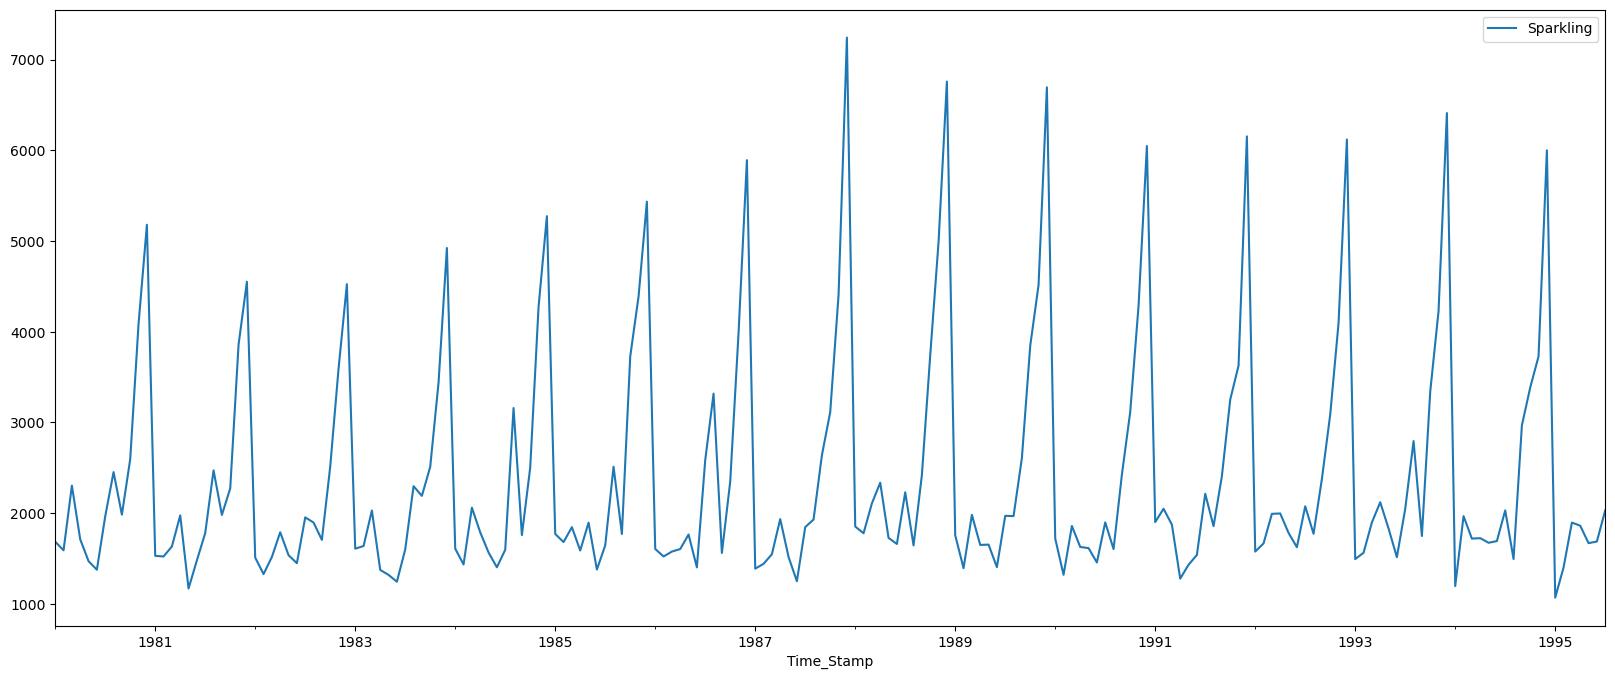

In [9]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot()


#### Insights:

The graph of the time series data contains seasonality but no trend.

## 1.1.5 Perform EDA

### 1.1.5.1 Check the datatype of the columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


The database has 2 columns namely, YearMonth which is an object datatype and Sparkling column which is int64 datatype.
Both the columns have non-null values.

### 1.1.5.2 Check the shape of the dataset.

In [11]:
print("The dataset has ", df.shape[0] ,"rows and ", df.shape[1], "columns.")


The dataset has  187 rows and  2 columns.


### 1.1.5.3 Check the descriptive statistics

In [12]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

#### Insights:

* The basic measures of descriptive statistics tell us how the sale of wine has varied across years. 
* This measure of descriptive statistics has been averaged over the whole data without taking the time component into account.
* The maximum sales of wine over the years is 7242 while the minimum is 1070. 
* The mean sale of wine over all the years from 1980 to 1995 is 2402 while the median sale is 1874.


### 1.1.5.4 Plot a boxplot to understand the sales of wine across different years and within different months across years.

### 1.1.5.4.1 Yearly boxplot to show the sale of wine in different years

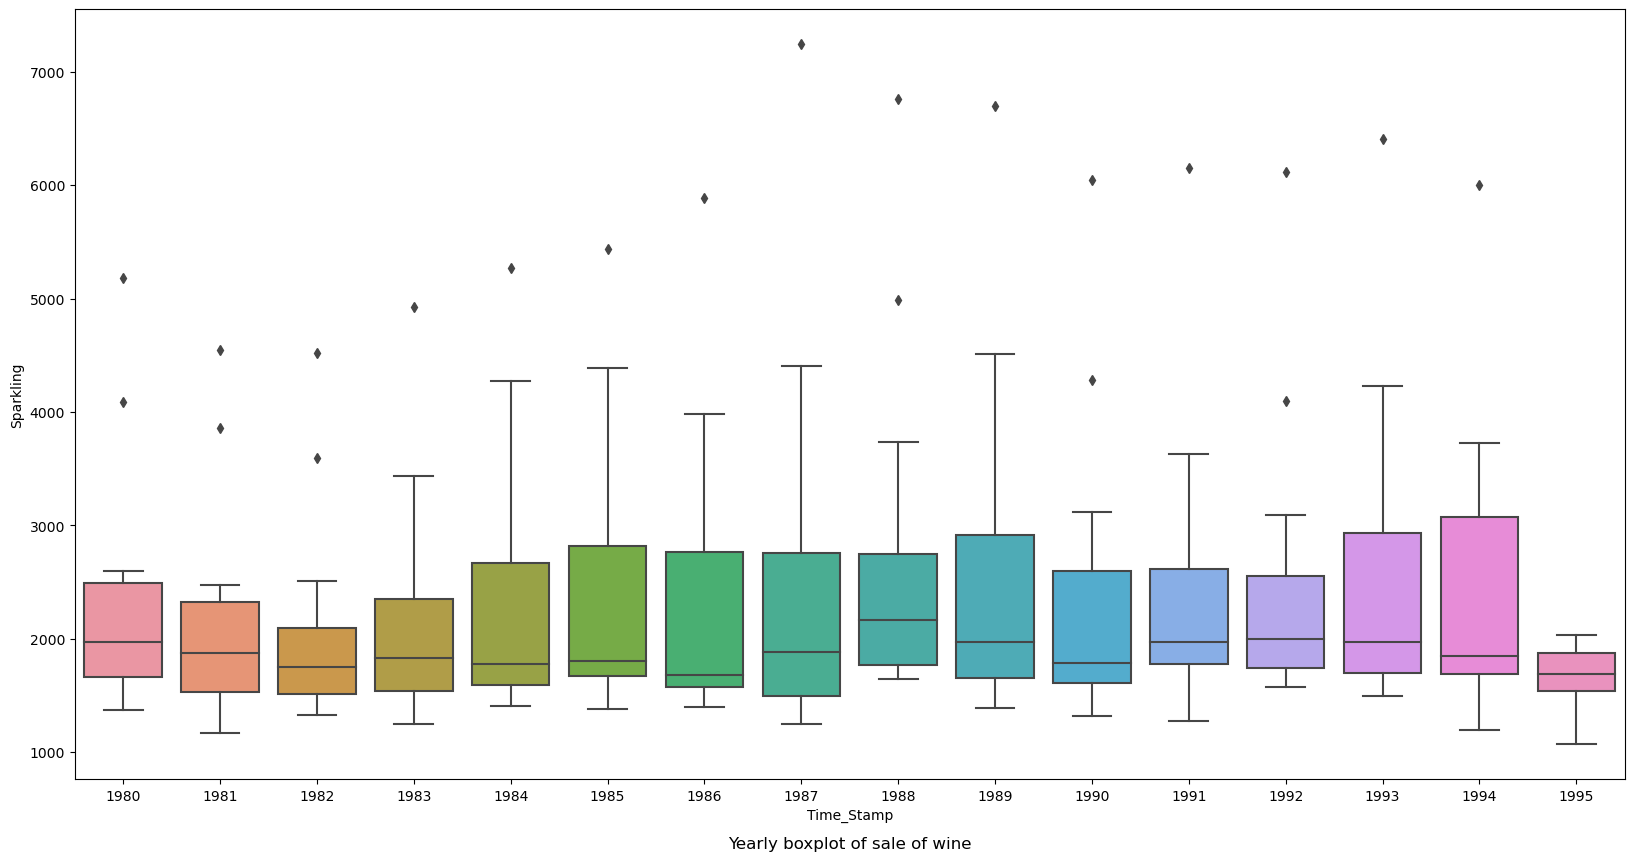

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x=df.index.year, y='Sparkling') 
plt.title("Yearly boxplot of sale of wine", y=-0.1)
plt.show()

#### Insights:

The yearly boxplot shows that the sale of Sparkling wine has decreased from 1980 to 1995.
The maximum sale of wine has occured in 1988 while the minimum is in the year 1995.

### 1.1.5.4.2 Monthly boxplot to show the sale of wine in different months.

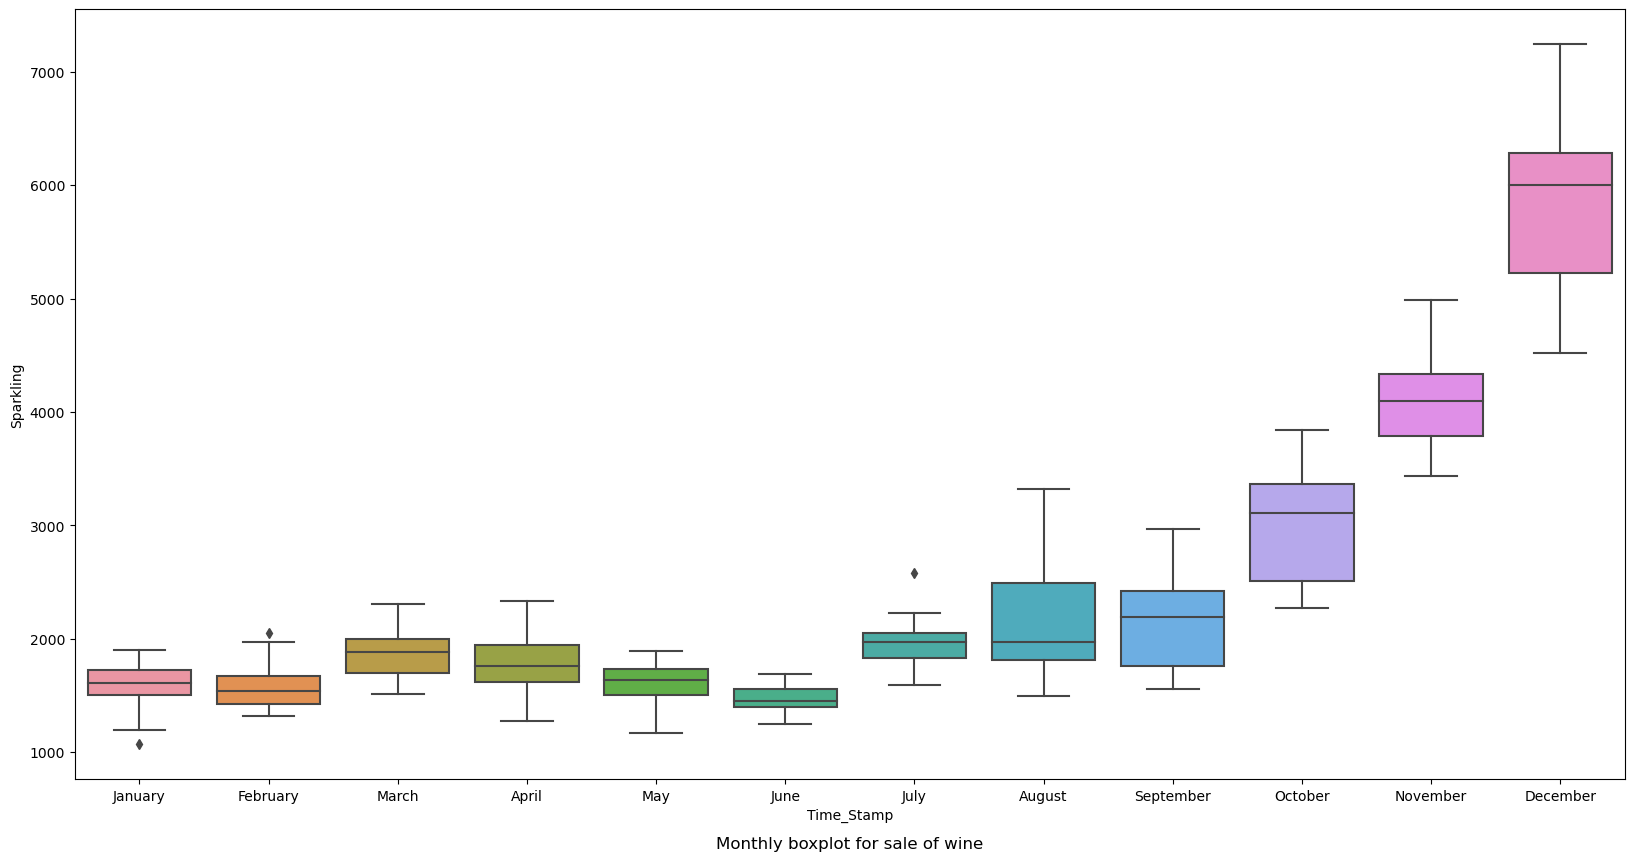

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x=df.index.month_name(), y='Sparkling') 
plt.title("Monthly boxplot for sale of wine", y=-0.1)
plt.show()

#### Insights:

* The monthly boxplot shows an upward trend of sale of wine from January to December.
* We see the sale of wine rising in the months of September, October, November and December, probably due to winters and the festive season.

### 1.1.5.5 Monthly boxplot to show the sale of wine in different months with mean line

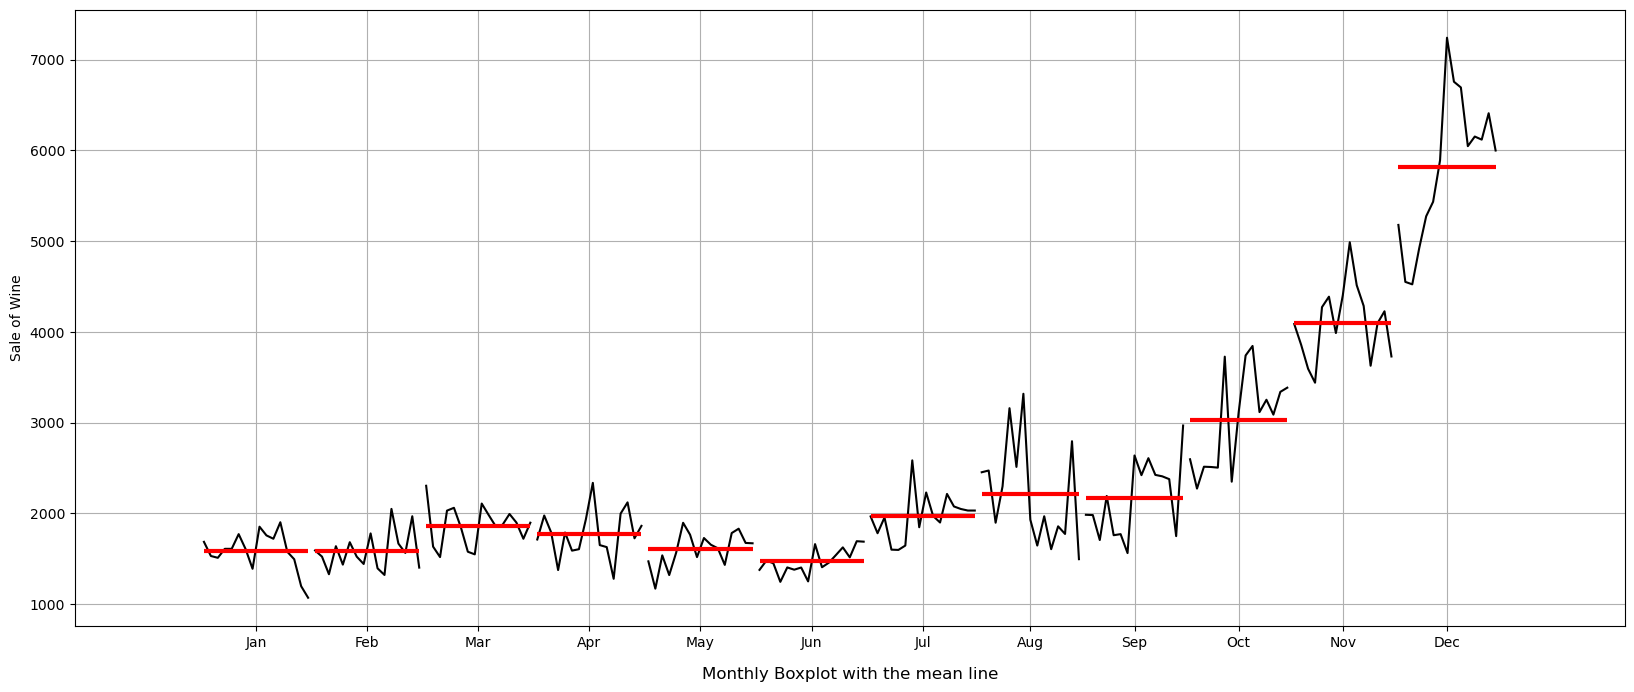

In [15]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sale of Wine')
plt.title("Monthly Boxplot with the mean line", y=-0.1)
plt.grid();

#### Insights:
This plot shows us the behaviour of the Time Series ('Sparkling Sales' in this case) across various months. The red line is the mean value. We see that the median sale of Sparkling wine is maximum in the month of December.

### 1.1.5.6 Plot a graph of monthly Sparkling Sales across years

In [16]:
#Complete the code to create a pivot table to display monthly sale across years
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

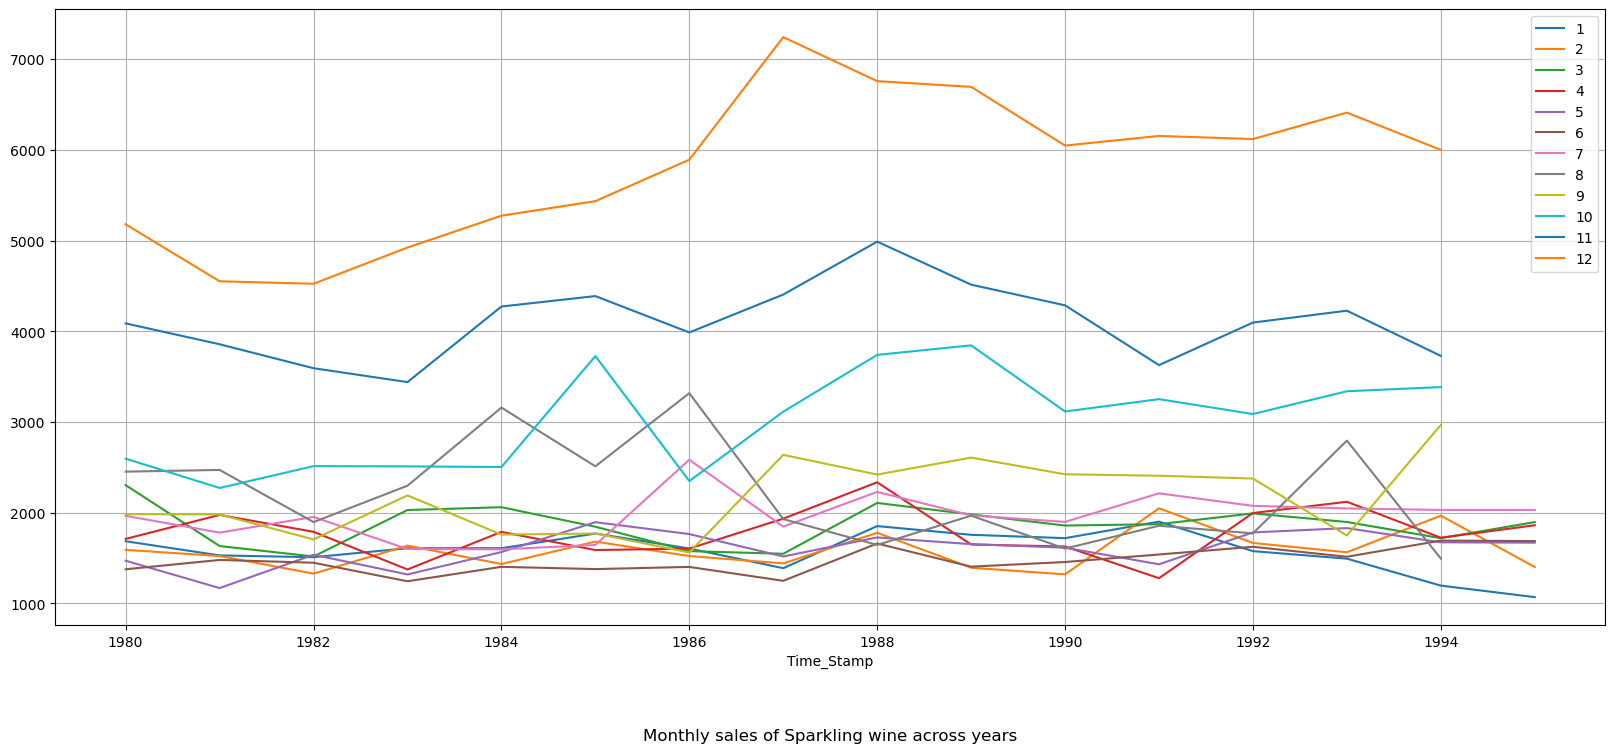

In [17]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best')
plt.title("Monthly sales of Sparkling wine across years", y=-0.2);

#### Insights:

* The plot shows the trend of month across the years.
* The monthly sales across years shows a clear distinction between the winter months, while the summer months are mostly overlapping each other.
* We see that December month fares the best in sale of wines.
* We see that from the 8th month itself, that is the month of September, the sale of wines starts picking up.


### 1.1.5.7 Plot the Empirical Cumulative Distribution

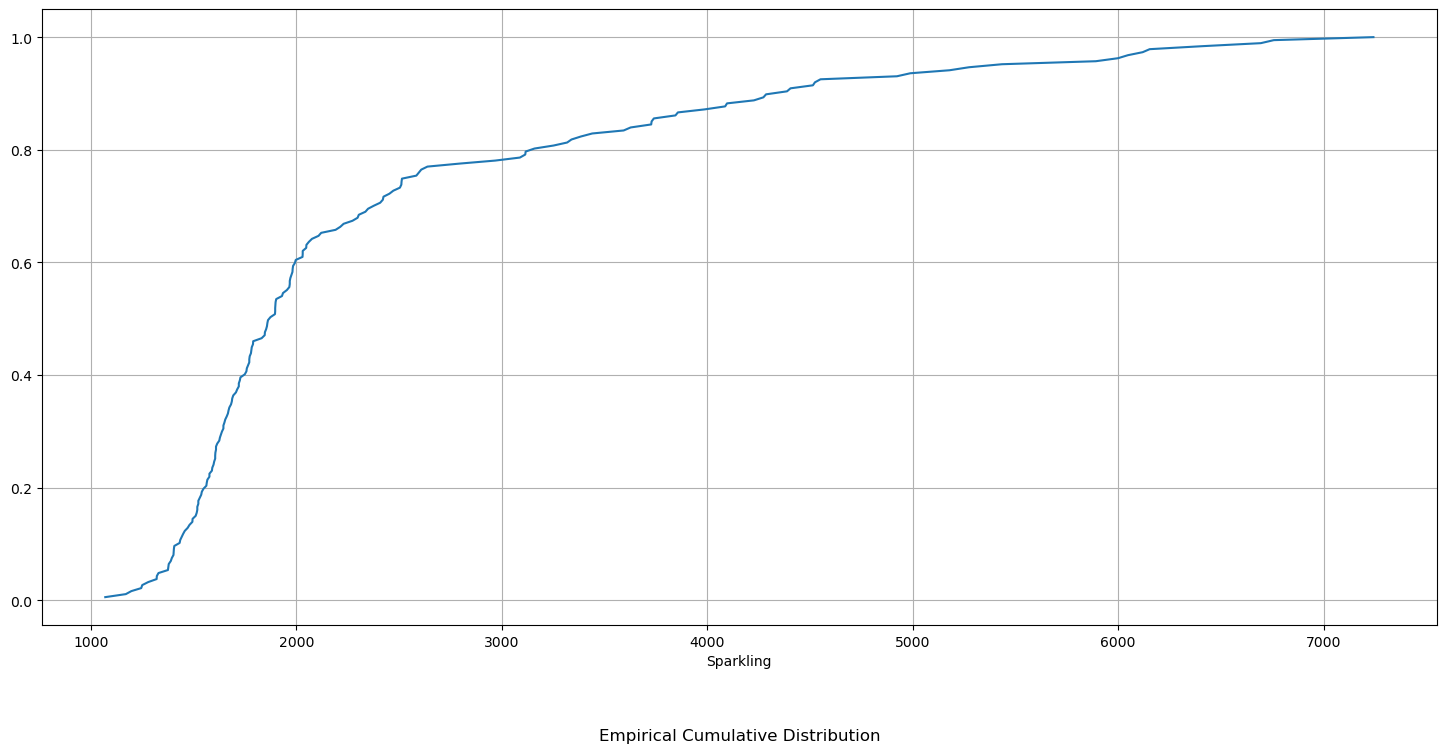

In [18]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling')
plt.title("Empirical Cumulative Distribution",y=-0.2);

## 1.1.6 Decomposition

### 1.6.1 Additive Decomposition

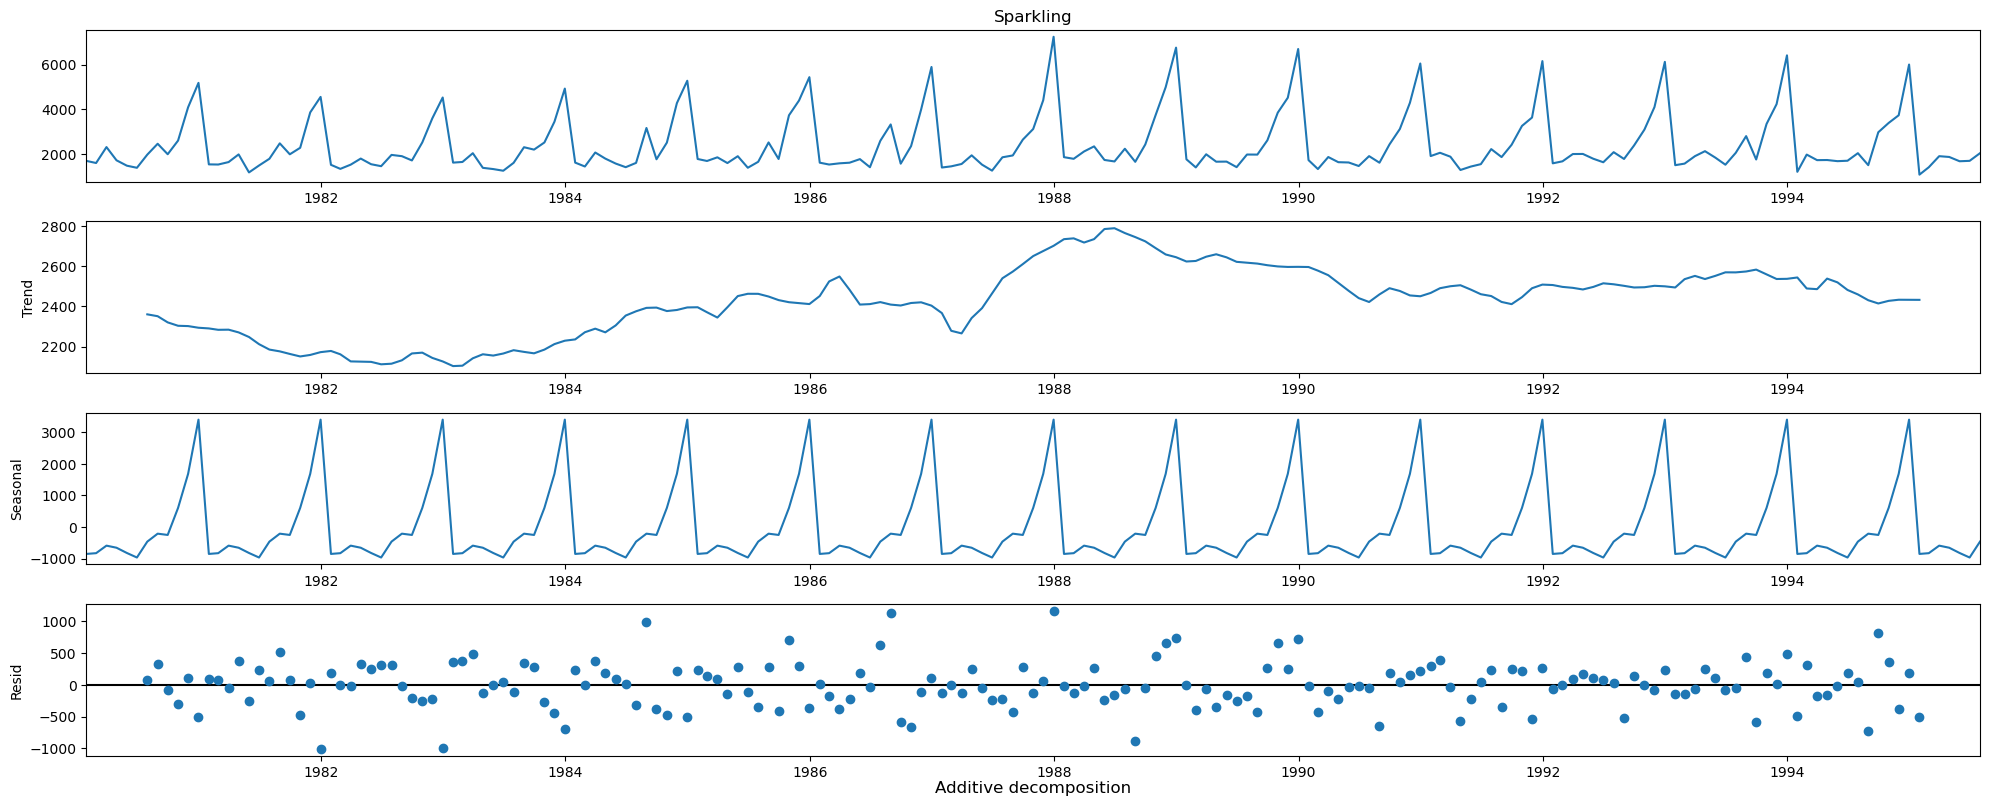

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot()
plt.title("Additive decomposition", y=-0.3);

In [20]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

## 1.6.2 Multiplicative Decomposition

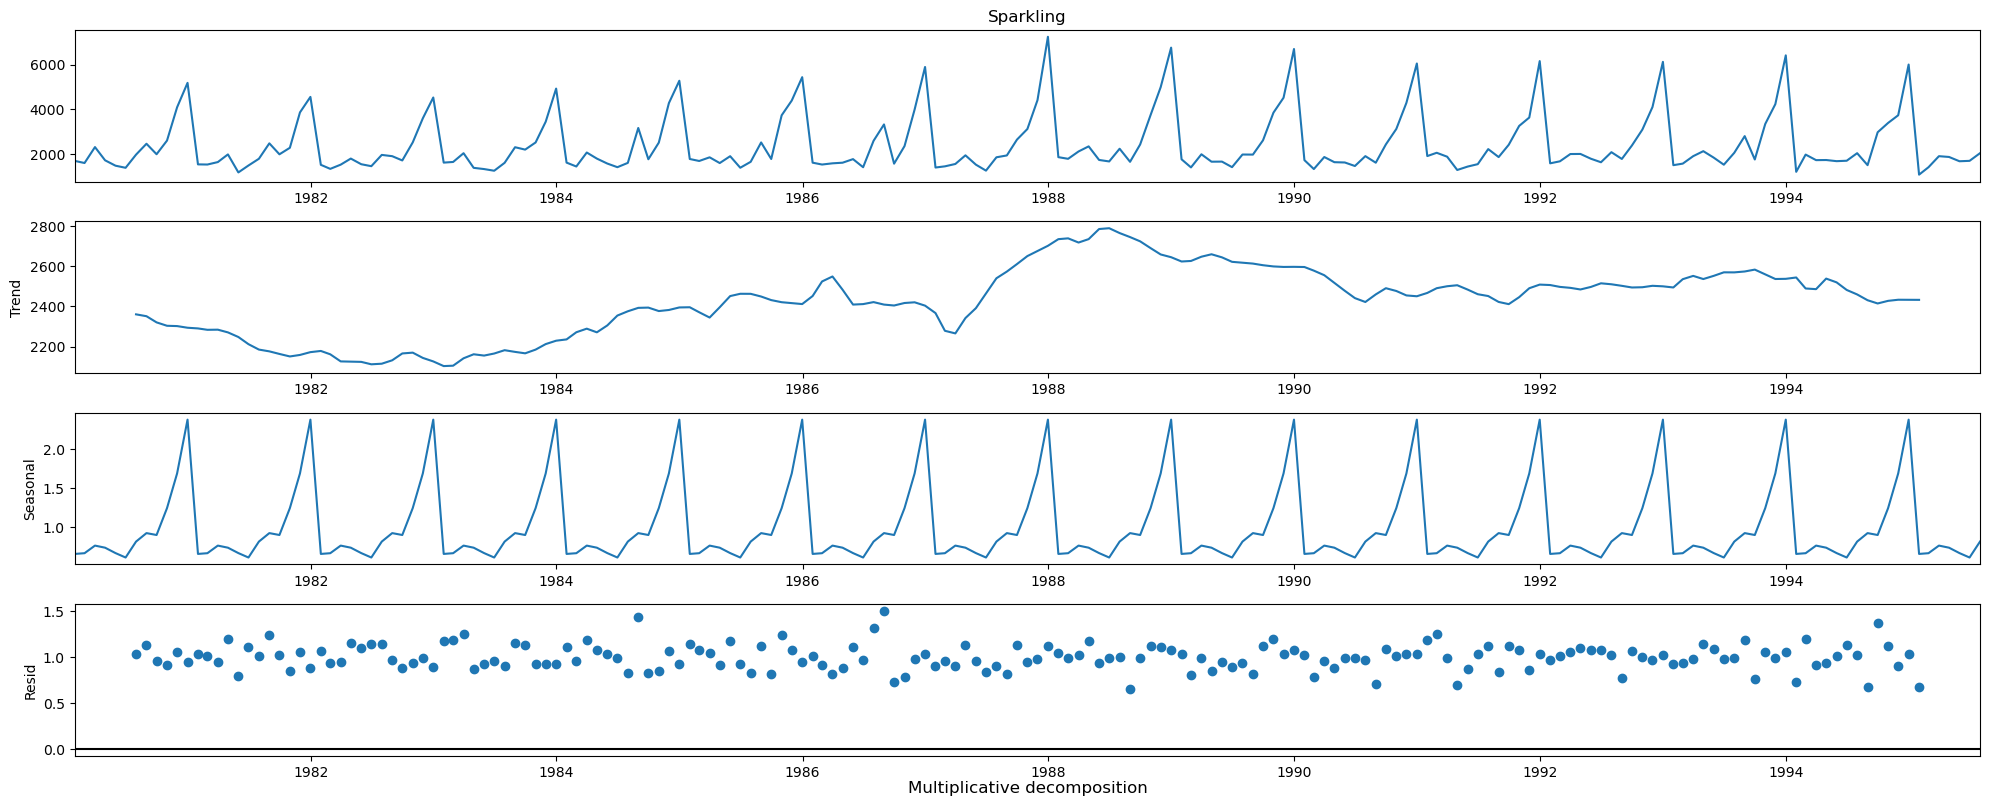

In [21]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot()
plt.title("Multiplicative decomposition", y=-0.3);

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

#### Insights:

After decomposition additively and multiplicatively and observing the trend, seasonality and residuals, we come to a conclusion that the residuals is almost uniform and flat in the multiplicative decomposition.

Hence, we go for multiplicative decomposition.

# 1.2 Data Preprocessing

## 1.2.1 Missing value treatment

In [23]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

We can see that there are no missing values in the dataset.

## 1.2.2 Visualize the processed data

### 1.2.2.1 Plot the time series data

<Axes: xlabel='Time_Stamp'>

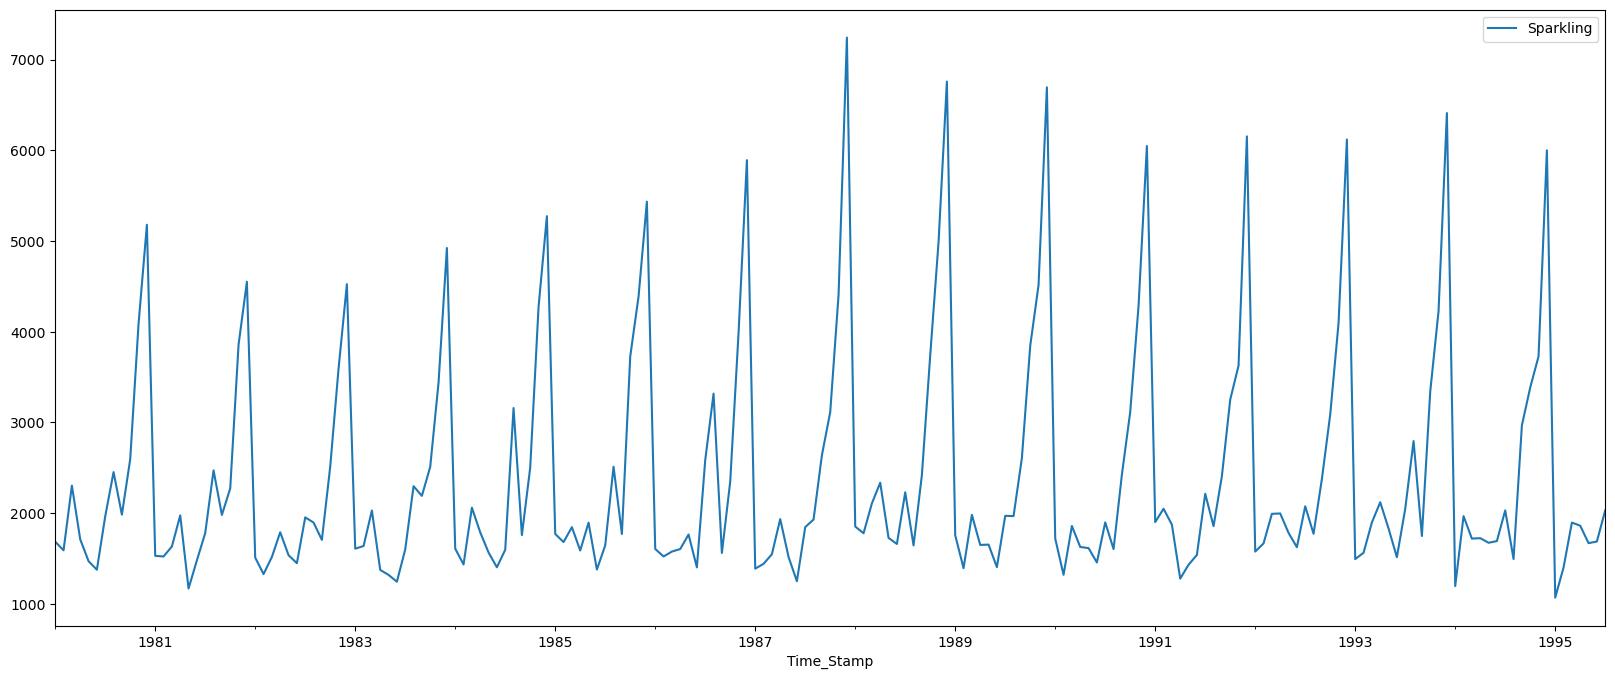

In [24]:
# Plot the time series data

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot()


### 1.2.2.2 Plot the average sale of wine per month and the month on month percentage change of sale of wine.

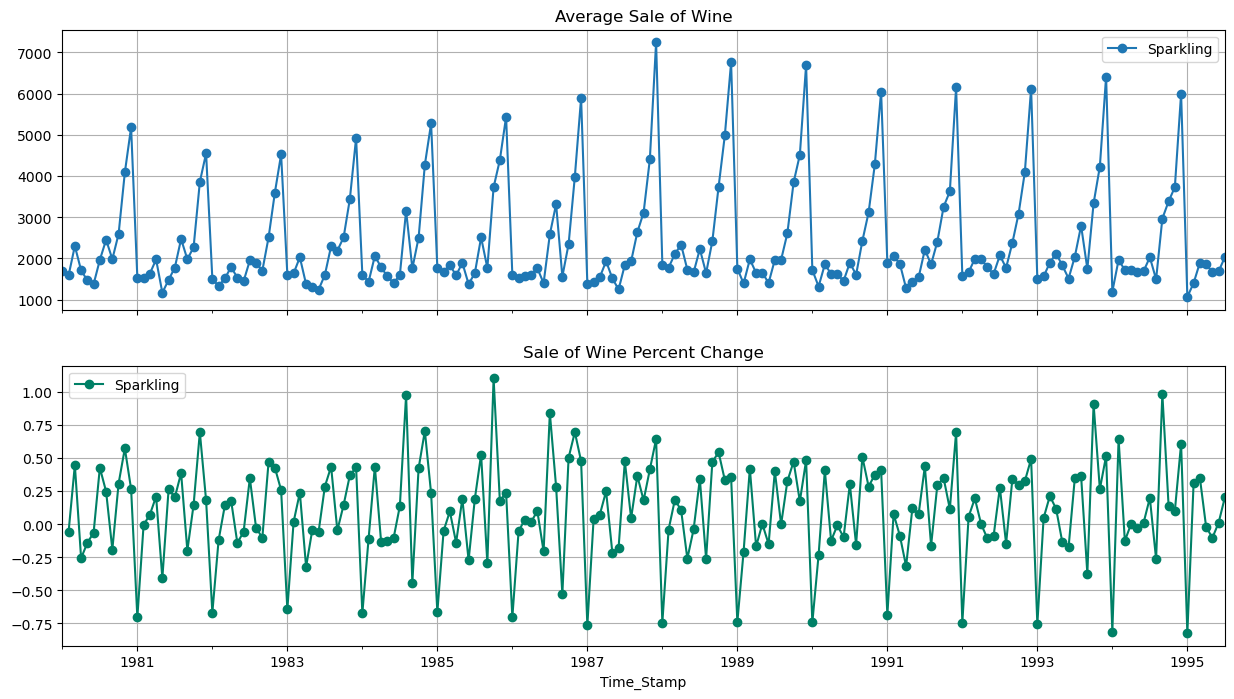

In [25]:
# group by date and get average sale of wine, and percent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

## plot the average sale of wine
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sale of Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot percent change of sale of wine over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sale of Wine Percent Change",grid=True)

### 1.2.2.3 Resampling the monthly data into a quarterly and yearly format and comparing the Time Series plots


### Decade Plot

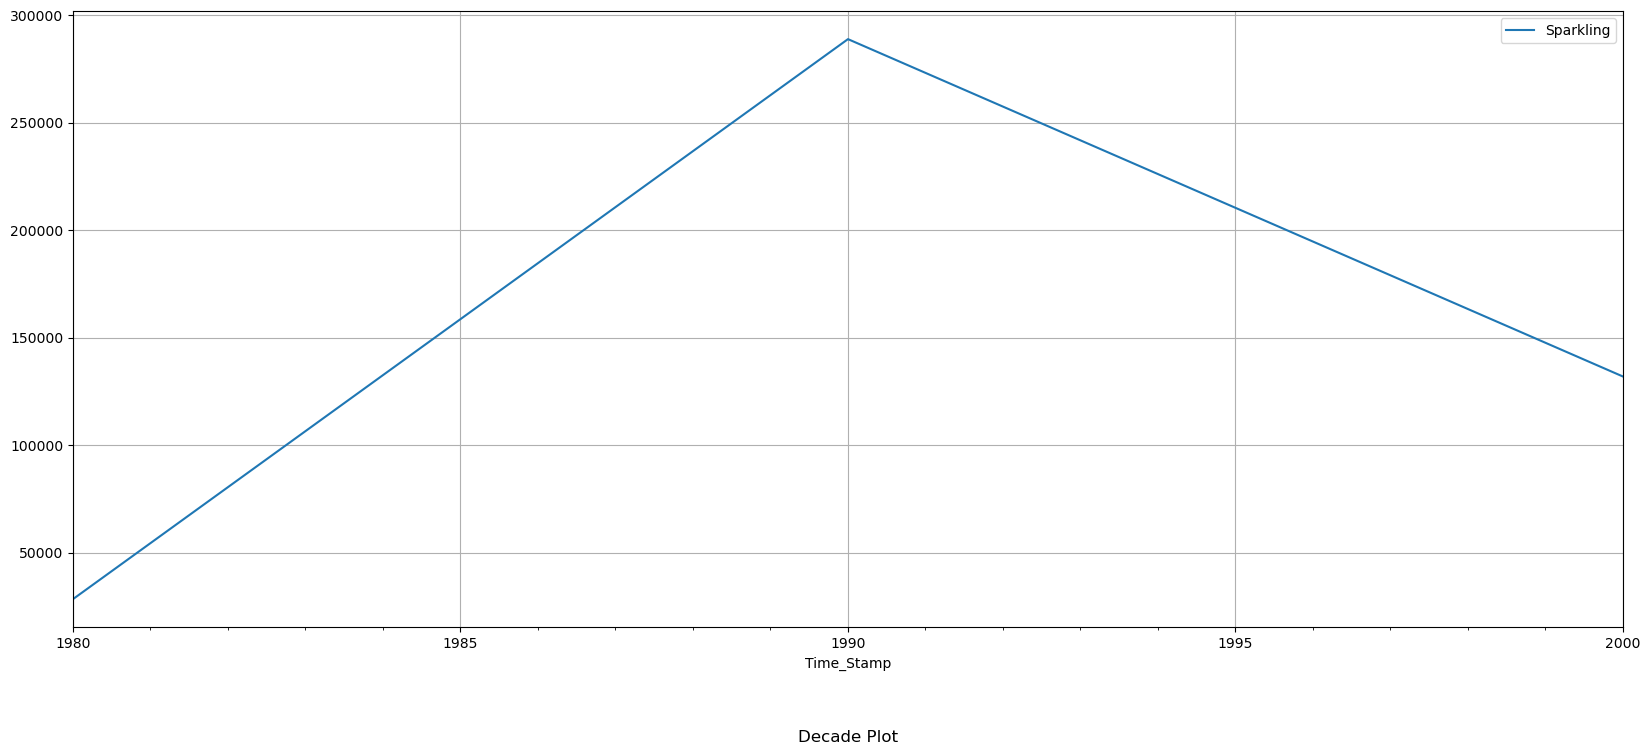

In [26]:
df_decade_sum = df.resample('10A').sum()
df_decade_sum.plot()
plt.title("Decade Plot", y=-0.2)
plt.grid()

### Yearly Plot

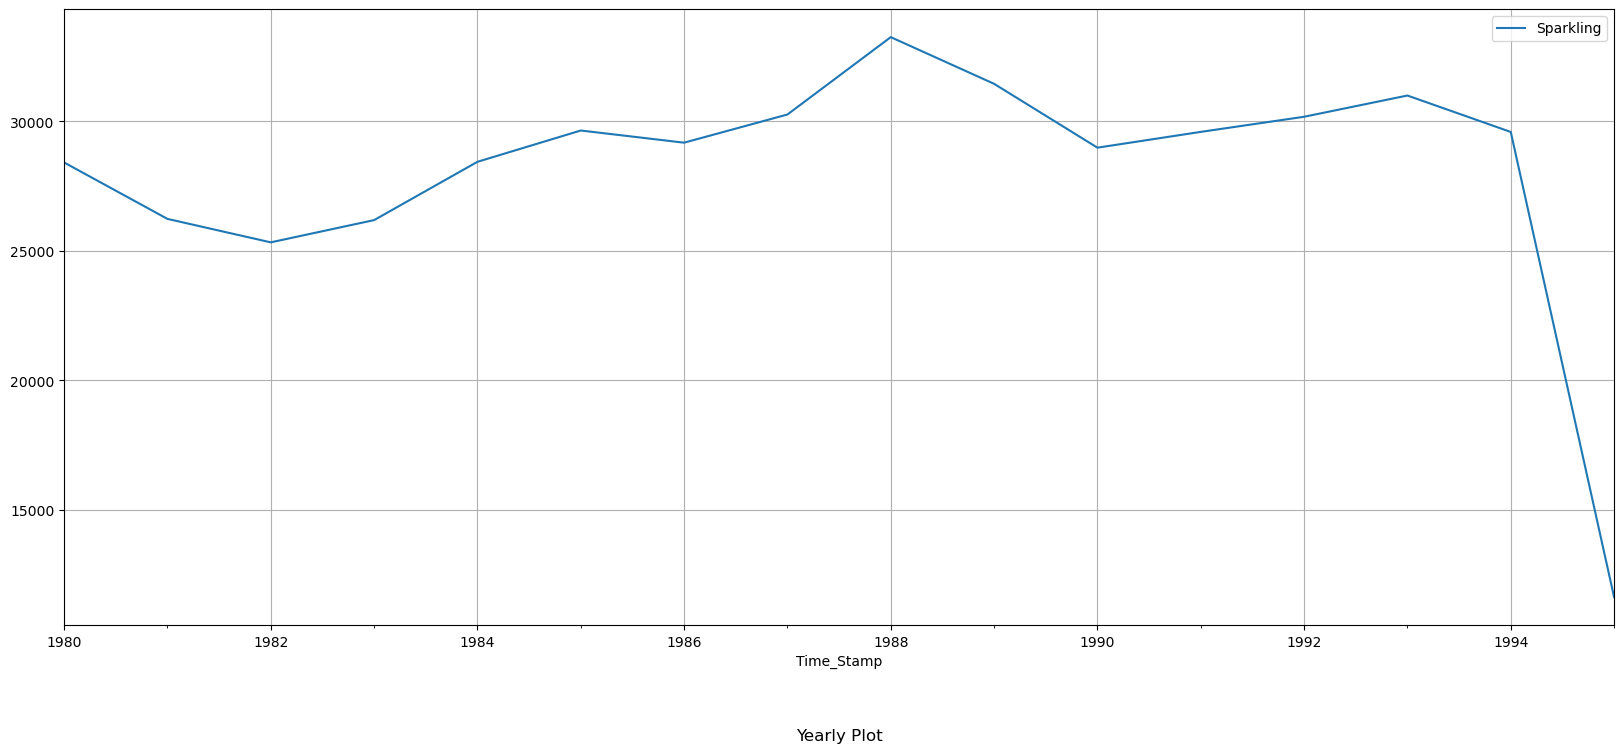

In [27]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.plot()
plt.title("Yearly Plot", y=-0.2)
plt.grid()

### Quarterly Plot

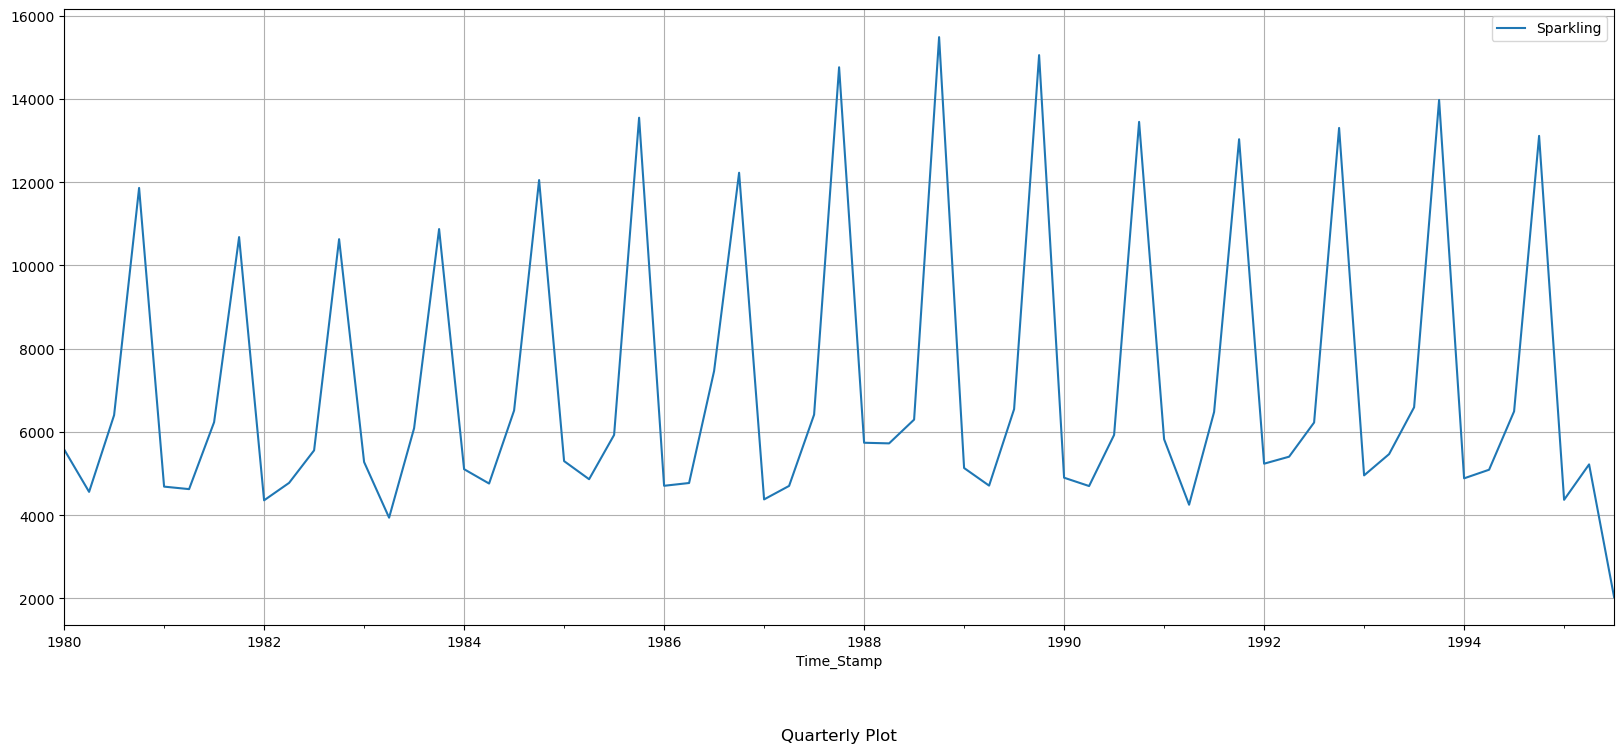

In [28]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.plot()
plt.title("Quarterly Plot", y=-0.2)
plt.grid()

### Insights:

On resampling, we observe that the decade plot and yearly plot are able to capture the trend of the sale of wine over the years, while the quarterly plot could capture only the seasonality.

## 1.2.3 Train-test split

In [29]:
#Complete the code to split train set and test set in the ratio 75:25
train    =   df[0:int(len(df)*0.75)] 
test     =   df[int(len(df)*0.75):]

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

Last few rows of Training Data


YearMonth  Sparkling
Time_Stamp                     
1991-04-30   1991-04       1279
1991-05-31   1991-05       1432
1991-06-30   1991-06       1540
1991-07-31   1991-07       2214
1991-08-31   1991-08       1857

First few rows of Test Data


YearMonth  Sparkling
Time_Stamp                     
1991-09-30   1991-09       2408
1991-10-31   1991-10       3252
1991-11-30   1991-11       3627
1991-12-31   1991-12       6153
1992-01-31   1992-01       1577

Last few rows of Test Data


YearMonth  Sparkling
Time_Stamp                     
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995-07-31   1995-07       2031

In [31]:
#Complete the code to check the shape of train and test sets
print(train.shape)
print(test.shape)

(140, 2)
(47, 2)


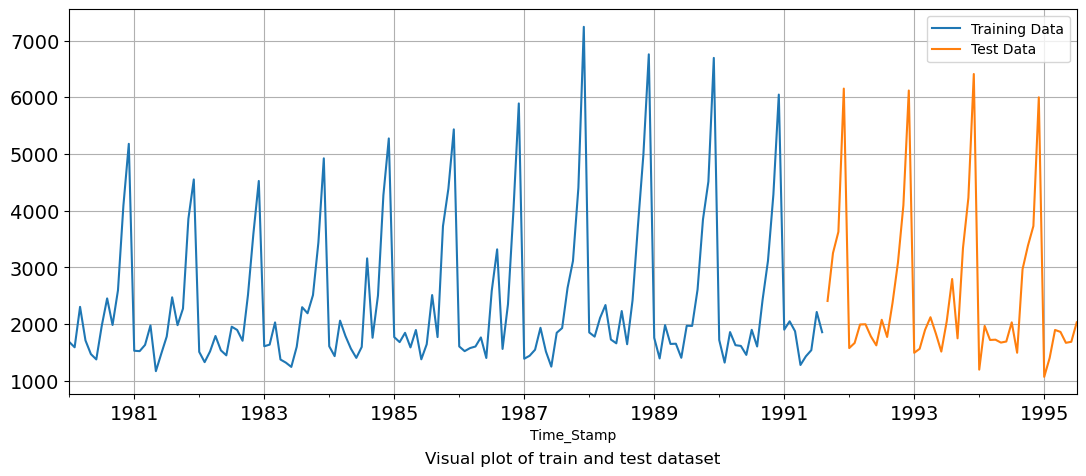

In [32]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Visual plot of train and test dataset", y=-0.2)
plt.show()


## 1.3 Model Building - Original data

## Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple)

## 1.3.1 Linear Regression Model

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+141 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Test Time instance 
 [141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1980-01-31   1980-01       1686     1
1980-02-29   1980-02       1591     2
1980-03-31   1980-03       2304     3
1980-04-30   1980-04       1712     4
1980-05-31   1980-05       1471     5 

Last few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1991-04-30   1991-04       1279   136
1991-05-31   1991-05       1432   137
1991-06-30   1991-06       1540   138
1991-07-31   1991-07       2214   139
1991-08-31   1991-08       1857   140 

First few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1991-09-30   1991-09       2408   141
1991-10-31   1991-10       3252   142
1991-11-30   1991-11       3627   143
1991-12-31   1991-12       6153   144
1992-01-31   1992-01       1577   145 

Last few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                      

Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)


LinearRegression()

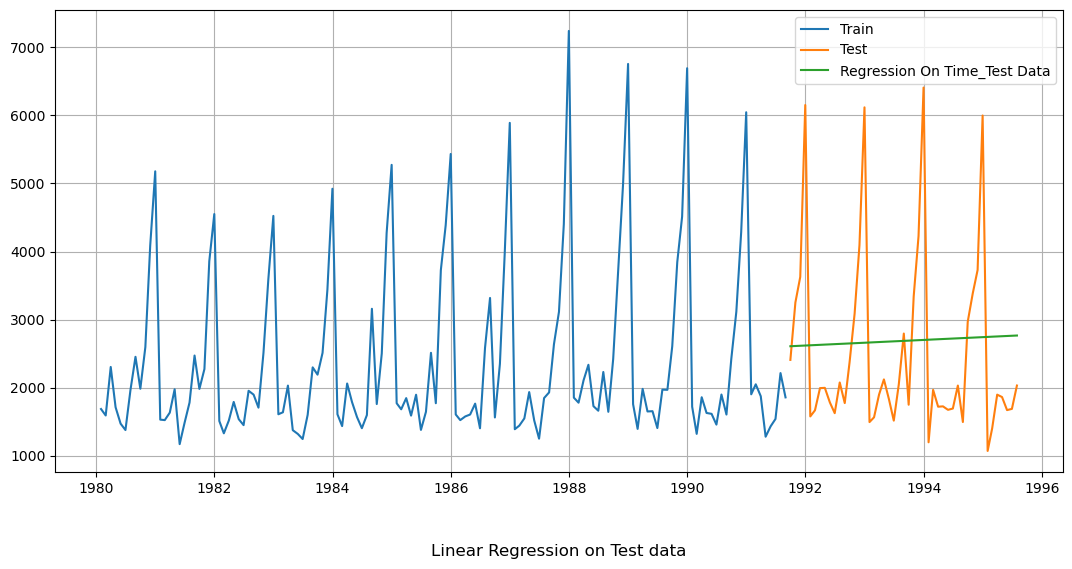

In [36]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

#pass xtest to get the ytest
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title("Linear Regression on Test data", y=-0.2)
plt.legend(loc='best')
plt.grid();

## Accuracy Metrics/Model Evaluation

In [37]:
from sklearn import metrics
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1363.119


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['LinearRegressionOnTime'])
resultsDf

Test RMSE
LinearRegressionOnTime  1363.118736

## 1.3.2 Simple Average Method

### For this particular simple average method, we will forecast by using the average of the training values.

In [39]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [40]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

YearMonth  Sparkling  mean_forecast
Time_Stamp                                    
1991-09-30   1991-09       2408    2367.471429
1991-10-31   1991-10       3252    2367.471429
1991-11-30   1991-11       3627    2367.471429
1991-12-31   1991-12       6153    2367.471429
1992-01-31   1992-01       1577    2367.471429

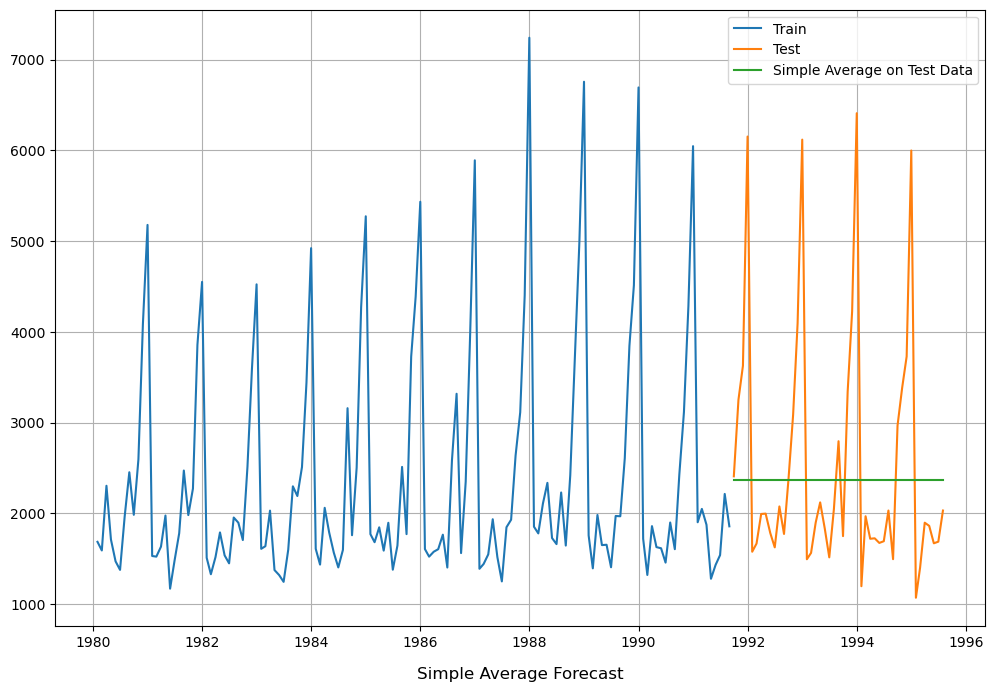

In [41]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast", y=-0.1)
plt.grid();

## Model Evaluation - Root Mean Squared Error

In [42]:
## Test Data - RMSE 

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 1351.788


In [43]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
LinearRegressionOnTime  1363.118736
SimpleAverageModel      1351.787809

## 1.3.3 Moving Average Model

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

In [44]:
MovingAverage = df.copy()
MovingAverage.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [45]:
MovingAverage.shape

(187, 2)

In [46]:
### Trailing Moving Averages

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

YearMonth  Sparkling  Trailing_2  Trailing_4  Trailing_6  \
Time_Stamp                                                            
1980-01-31   1980-01       1686         NaN         NaN         NaN   
1980-02-29   1980-02       1591      1638.5         NaN         NaN   
1980-03-31   1980-03       2304      1947.5         NaN         NaN   
1980-04-30   1980-04       1712      2008.0     1823.25         NaN   
1980-05-31   1980-05       1471      1591.5     1769.50         NaN   

            Trailing_9  
Time_Stamp              
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

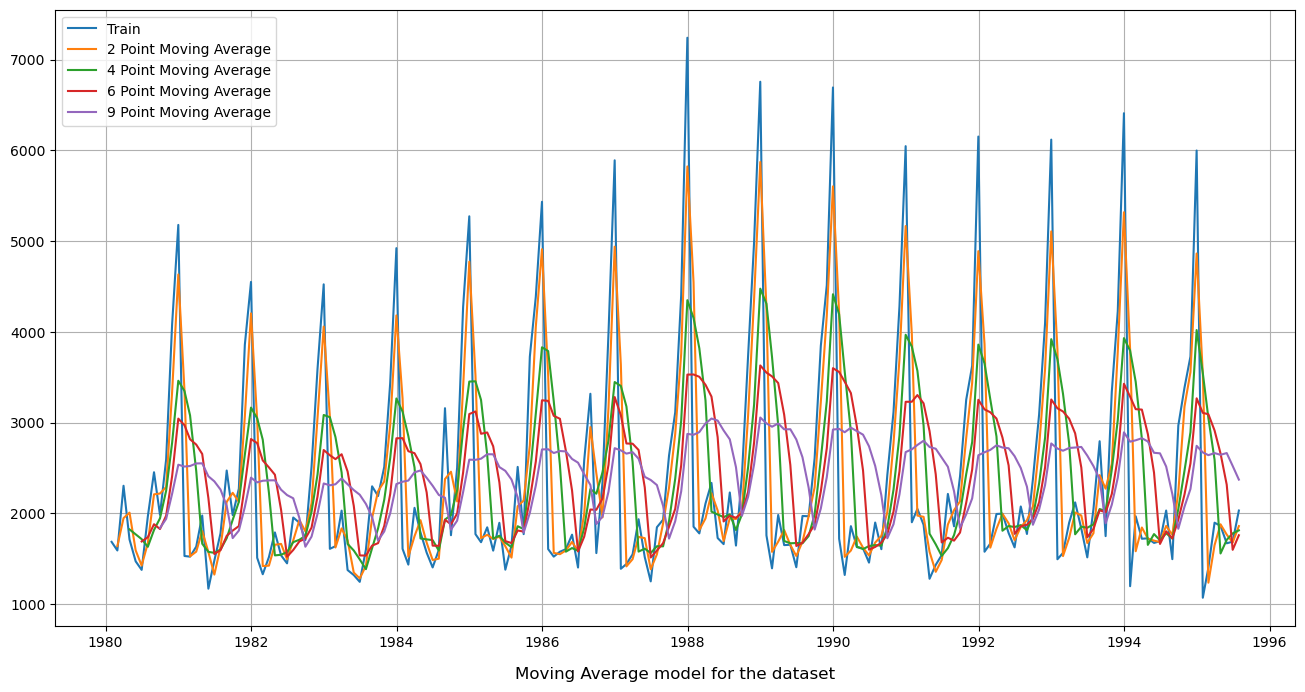

In [47]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Moving Average model for the dataset", y=-0.1)
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [48]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.75)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.75):]

In [49]:
trailing_MovingAverage_train.shape

(140, 6)

In [50]:
trailing_MovingAverage_test.shape

(47, 6)

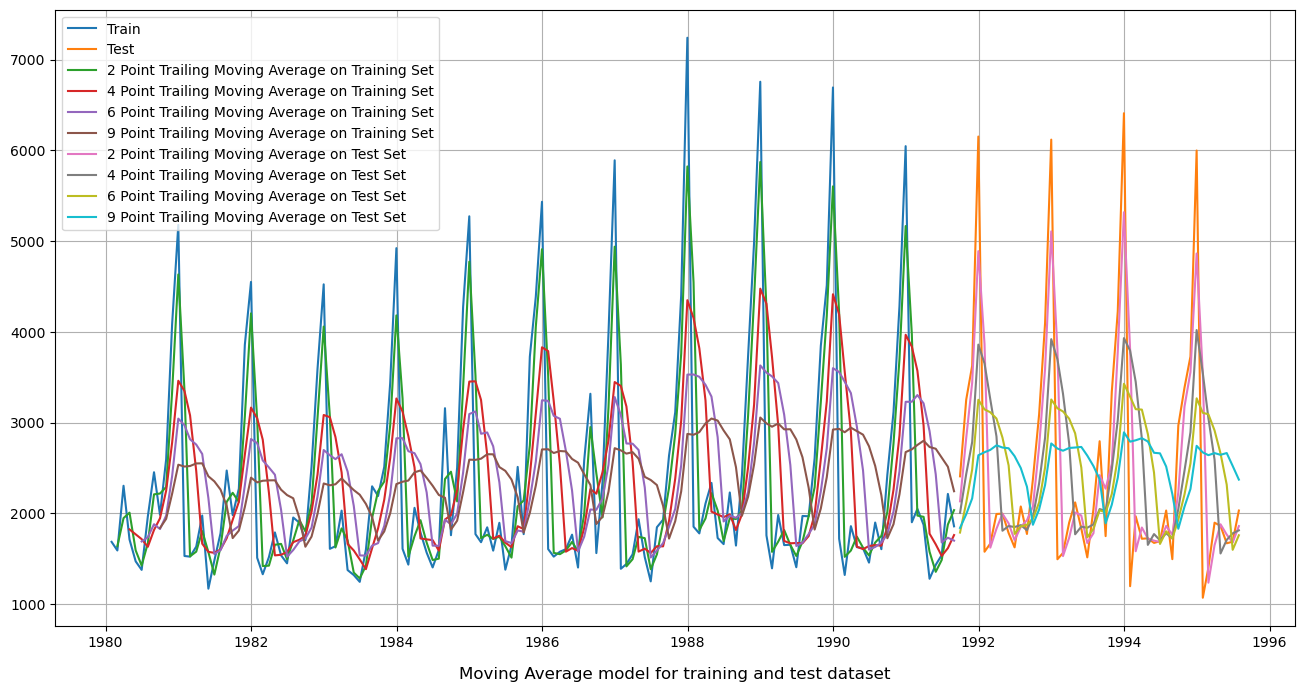

In [51]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Moving Average model for training and test dataset",y=-0.1)
plt.grid();

## Model Evaluation

In [52]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model3_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  Test RMSE is %3.3f" %(rmse_model3_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model3_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  Test RMSE is %3.3f" %(rmse_model3_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model3_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  Test RMSE is %3.3f" %(rmse_model3_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model3_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  Test RMSE is %3.3f " %(rmse_model3_test_9))

For 2 point Moving Average Model forecast on the Test Data,  Test RMSE is 823.047
For 4 point Moving Average Model forecast on the Test Data,  Test RMSE is 1181.849
For 6 point Moving Average Model forecast on the Test Data,  Test RMSE is 1317.753
For 9 point Moving Average Model forecast on the Test Data,  Test RMSE is 1403.221 


In [53]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
LinearRegressionOnTime       1363.118736
SimpleAverageModel           1351.787809
2pointTrailingMovingAverage   823.047225
4pointTrailingMovingAverage  1181.849251
6pointTrailingMovingAverage  1317.752534
9pointTrailingMovingAverage  1403.220949

## 1.3.4 Simple Exponential Smoothing

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [55]:
SES_train = train.copy()
SES_test = test.copy()

In [56]:
SES_test.shape

(47, 2)

In [57]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.037998535269225045,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2174.94398277828,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

YearMonth  Sparkling      predict
Time_Stamp                                  
1991-09-30   1991-09       2408  2430.457075
1991-10-31   1991-10       3252  2430.457075
1991-11-30   1991-11       3627  2430.457075
1991-12-31   1991-12       6153  2430.457075
1992-01-31   1992-01       1577  2430.457075

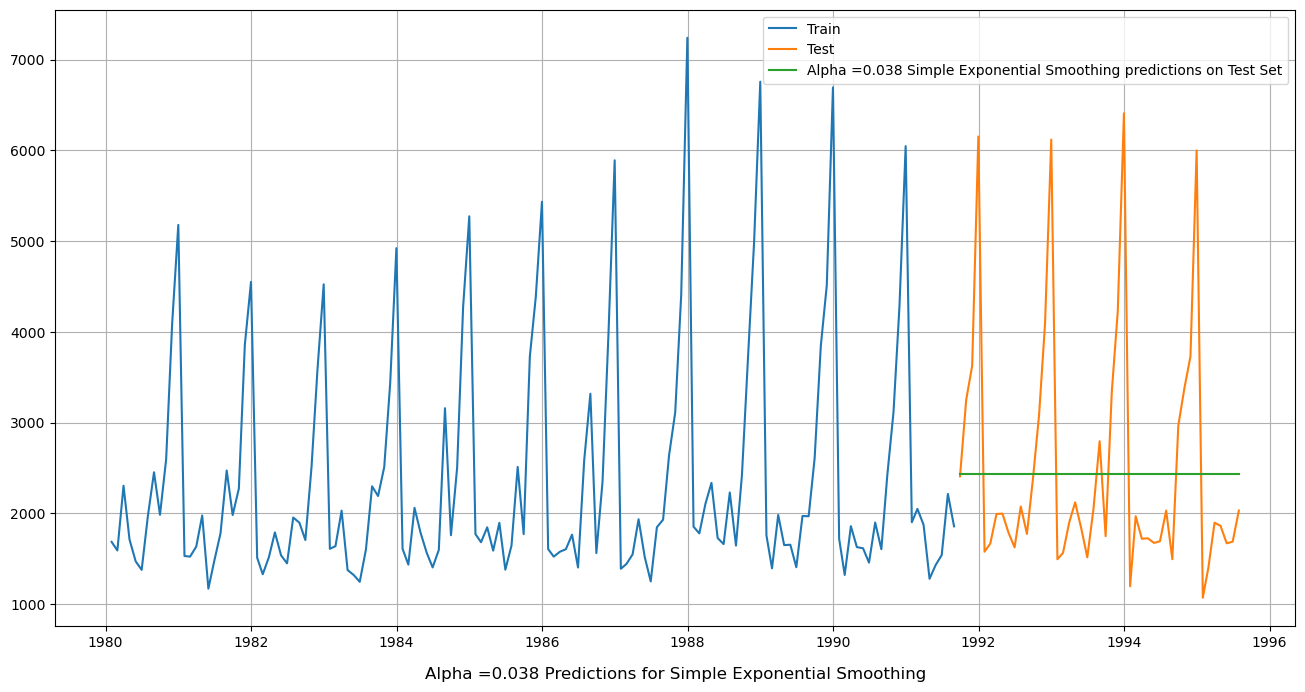

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.038 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.038 Predictions for Simple Exponential Smoothing',y=-0.1);

## Model Evaluation for  𝛼  = 0.038 : Simple Exponential Smoothing

In [60]:
## Test Data

rmse_model4_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.038 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_1))


For Alpha =0.038 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1346.767


In [61]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_1]},index=['Alpha=0.038,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
LinearRegressionOnTime                  1363.118736
SimpleAverageModel                      1351.787809
2pointTrailingMovingAverage              823.047225
4pointTrailingMovingAverage             1181.849251
6pointTrailingMovingAverage             1317.752534
9pointTrailingMovingAverage             1403.220949
Alpha=0.038,SimpleExponentialSmoothing  1346.767434

## 1.3.5 Double Exponential Smoothing (Holt's Method)

In [62]:
DES_train = train.copy()
DES_test = test.copy()

In [63]:
model_DES = Holt(DES_train['Sparkling'])


In [64]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [65]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=47)
        
        rmse_model5_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model5_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_5 = resultsDf_5.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model5_train
                                          ,'Test RMSE':rmse_model5_test}, ignore_index=True)

In [66]:
resultsDf_5


Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1584.674770   5567.348062
1            0.3          0.4  1681.973356   6823.685303
2            0.3          0.5  1780.765411   7021.927796
3            0.3          0.6  1869.286145   5261.465508
4            0.3          0.7  1932.307473   1755.102281
..           ...          ...          ...           ...
59           1.0          0.6  1778.819464   2320.048084
60           1.0          0.7  1852.700545   3606.526658
61           1.0          0.8  1931.904438   5471.361534
62           1.0          0.9  2018.004340   7770.324257
63           1.0          1.0  2113.450598  10422.550071

[64 rows x 4 columns]

In [67]:
resultsDf_5.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
39           0.7          1.0  1836.397580  1409.796784
49           0.9          0.4  1601.418561  1424.105538
51           0.9          0.6  1716.675398  1425.161134
32           0.7          0.3  1513.986303  1439.385942
40           0.8          0.3  1523.787387  1442.396655

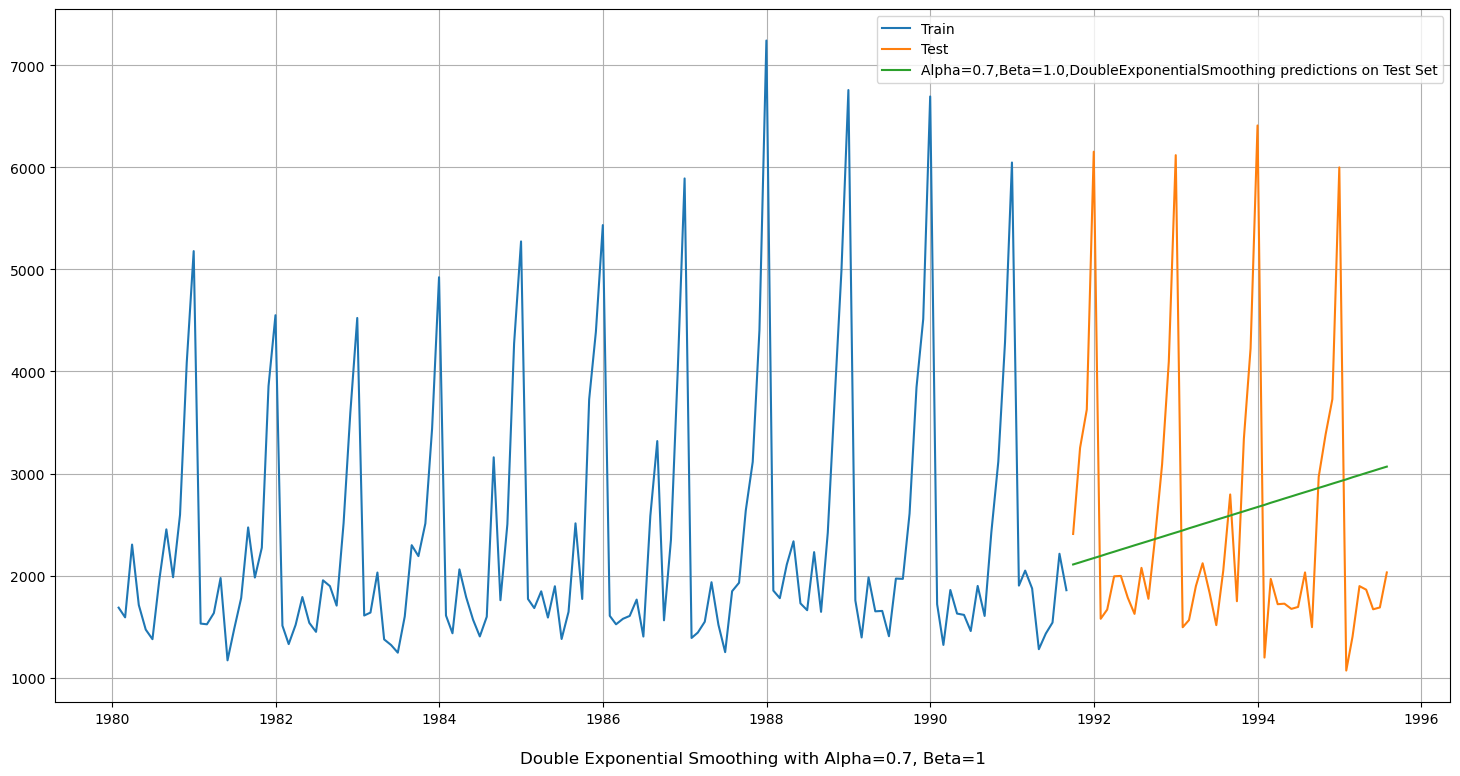

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.7000000000000002, 1.0000000000000002], label='Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Double Exponential Smoothing with Alpha=0.7, Beta=1",y=-0.1)
plt.grid();

In [69]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

Test RMSE
LinearRegressionOnTime                         1363.118736
SimpleAverageModel                             1351.787809
2pointTrailingMovingAverage                     823.047225
4pointTrailingMovingAverage                    1181.849251
6pointTrailingMovingAverage                    1317.752534
9pointTrailingMovingAverage                    1403.220949
Alpha=0.038,SimpleExponentialSmoothing         1346.767434
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing  1409.796784

## 1.3.6 Triple Exponential Smoothing

### Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [70]:
TES_train = train.copy()
TES_test = test.copy()

In [71]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [72]:
model_TES_autofit = model_TES.fit()

In [73]:
model_TES_autofit.params

{'smoothing_level': 0.07495701901412172,
 'smoothing_trend': 0.06360627949032575,
 'smoothing_seasonal': 0.34843371840494447,
 'damping_trend': nan,
 'initial_level': 2352.641870469884,
 'initial_trend': -10.826464244175932,
 'initial_seasons': array([0.70544573, 0.67651164, 0.88591768, 0.79499371, 0.63869679,
        0.63576472, 0.86275191, 1.10991329, 0.90374767, 1.19041469,
        1.83982412, 2.34432157]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

YearMonth  Sparkling  auto_predict
Time_Stamp                                   
1991-09-30   1991-09       2408   2377.726305
1991-10-31   1991-10       3252   3286.168165
1991-11-30   1991-11       3627   4372.177145
1991-12-31   1991-12       6153   6235.827176
1992-01-31   1992-01       1577   1753.043132

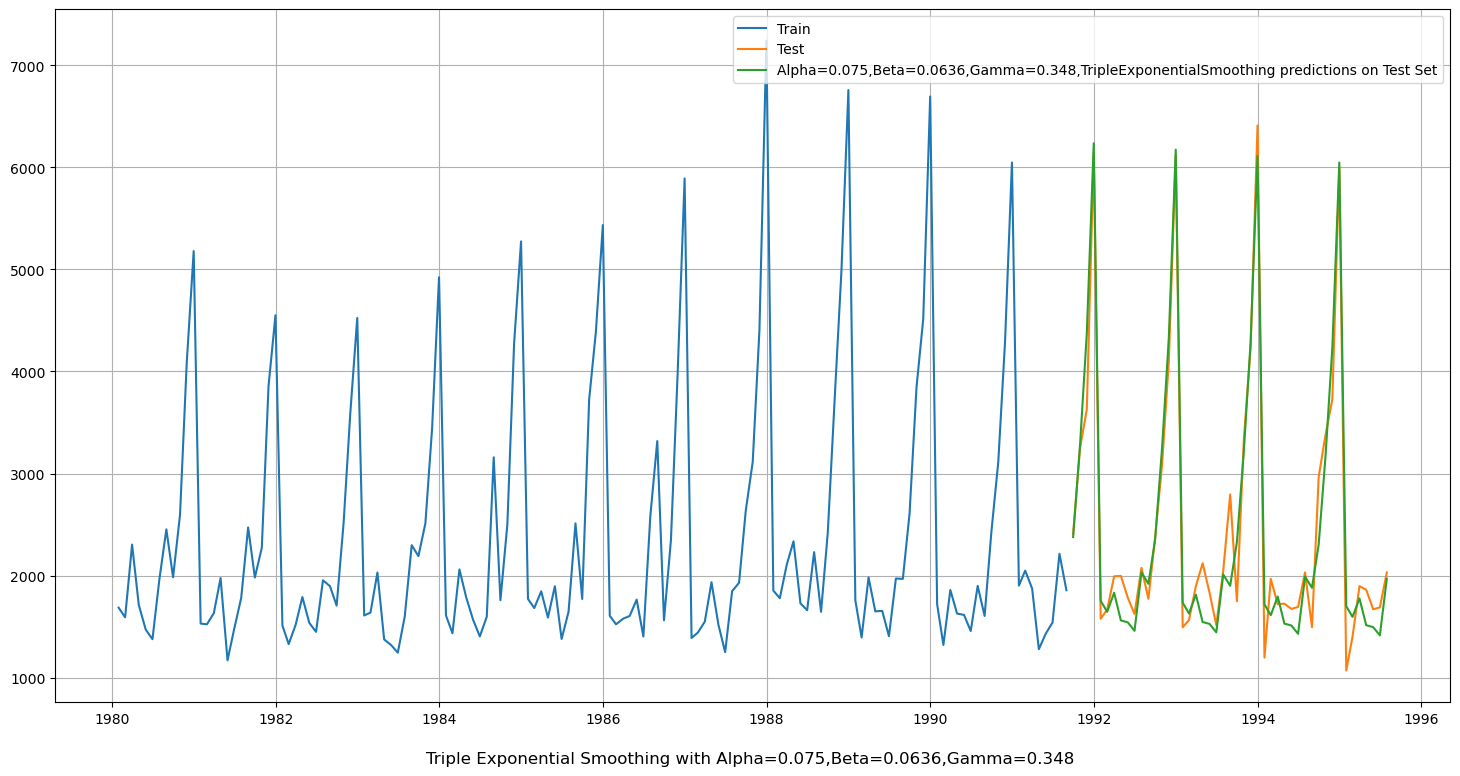

In [75]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.0636,Gamma=0.348,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Triple Exponential Smoothing with Alpha=0.075,Beta=0.0636,Gamma=0.348 ", y=-0.1)
plt.grid();

In [76]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.075,Beta=0.0636,Gamma=0.348, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.075,Beta=0.0636,Gamma=0.348, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 321.534


In [77]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.075,Beta=0.0636,Gamma=0.348,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
LinearRegressionOnTime                              1363.118736
SimpleAverageModel                                  1351.787809
2pointTrailingMovingAverage                          823.047225
4pointTrailingMovingAverage                         1181.849251
6pointTrailingMovingAverage                         1317.752534
9pointTrailingMovingAverage                         1403.220949
Alpha=0.038,SimpleExponentialSmoothing              1346.767434
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       1409.796784
Alpha=0.075,Beta=0.0636,Gamma=0.348,TripleExpon...   321.534274

## 1.3.7 Triple Exponential Smoothing with best values of alpha, beta, gamma

In [78]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [79]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i, j ,k] = model_TES_alpha_i_j_k.forecast(steps=47)
        
            rmse_model6_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model6_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_6_2 = resultsDf_6_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test}
                                                 , ignore_index=True)

In [80]:
resultsDf_6_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.3          0.3           0.3  4.018608e+02  9.922814e+02
1             0.3          0.3           0.4  4.044388e+02  4.633213e+02
2             0.3          0.3           0.5  4.130186e+02  9.114834e+02
3             0.3          0.3           0.6  4.299480e+02  1.818685e+03
4             0.3          0.3           0.7  4.583958e+02  2.922172e+03
..            ...          ...           ...           ...           ...
507           1.0          1.0           0.6  1.829538e+05  2.386472e+06
508           1.0          1.0           0.7  2.583348e+05  6.352903e+05
509           1.0          1.0           0.8  1.070159e+06  1.942124e+05
510           1.0          1.0           0.9  7.484468e+04  4.250533e+04
511           1.0          1.0           1.0  2.395496e+04  4.948455e+05

[512 rows x 5 columns]

In [81]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
336           0.8          0.5           0.3  589.395333  455.263457
1             0.3          0.3           0.4  404.438824  463.321309
265           0.7          0.4           0.4  558.615438  479.698239
152           0.5          0.6           0.3  514.136543  482.979769
344           0.8          0.6           0.3  627.702937  498.316351

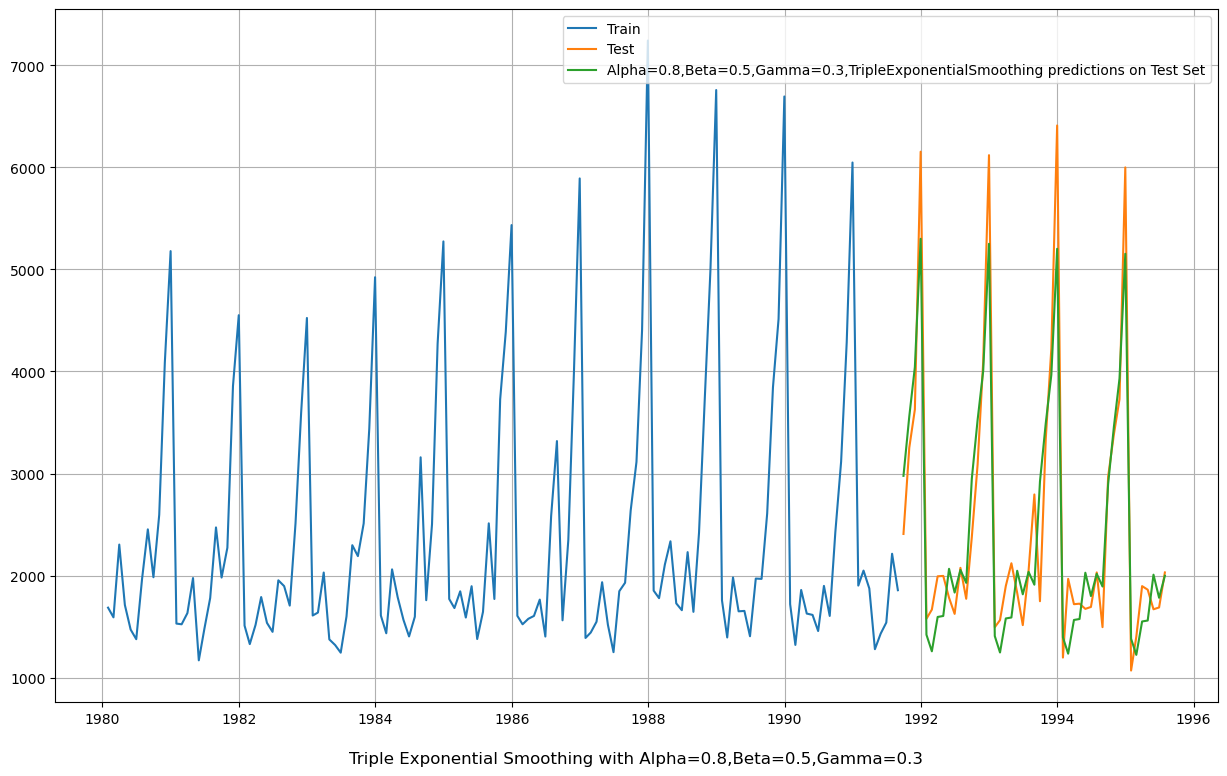

In [82]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(15,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.8000000000000003, 0.5, 0.3], label='Alpha=0.8,Beta=0.5,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Triple Exponential Smoothing with Alpha=0.8,Beta=0.5,Gamma=0.3", y=-0.1)
plt.grid();

In [83]:
resultsDf_6_3 = pd.DataFrame({'Test RMSE': [resultsDf_6_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.8,Beta=0.5,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf

Test RMSE
LinearRegressionOnTime                              1363.118736
SimpleAverageModel                                  1351.787809
2pointTrailingMovingAverage                          823.047225
4pointTrailingMovingAverage                         1181.849251
6pointTrailingMovingAverage                         1317.752534
9pointTrailingMovingAverage                         1403.220949
Alpha=0.038,SimpleExponentialSmoothing              1346.767434
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       1409.796784
Alpha=0.075,Beta=0.0636,Gamma=0.348,TripleExpon...   321.534274
Alpha=0.8,Beta=0.5,Gamma=0.3,TripleExponentialS...   455.263457

## 1.3.8 Check the performance of the models built

In [84]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.075,Beta=0.0636,Gamma=0.348,TripleExpon...   321.534274
Alpha=0.8,Beta=0.5,Gamma=0.3,TripleExponentialS...   455.263457
2pointTrailingMovingAverage                          823.047225
4pointTrailingMovingAverage                         1181.849251
6pointTrailingMovingAverage                         1317.752534
Alpha=0.038,SimpleExponentialSmoothing              1346.767434
SimpleAverageModel                                  1351.787809
LinearRegressionOnTime                              1363.118736
9pointTrailingMovingAverage                         1403.220949
Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing       1409.796784

### Insights:

We see that out of all the models built using Linear Regression, Simple Average, Moving Average, Simple Exponential Smoothing, Double Exponential Smoothing and Triple Exponential Smoothing, we see that the best model with the least root mean square error (RMSE) is the model with:

Alpha=0.075,Beta=0.0636,Gamma=0.348, Original TripleExponentialSmoothing

Hence, we will build the full model using Triple Exponential Smoothing with the above parameters for level(alpha), trend(beta) and seasonality(gamma).



### 1.3.8.1 Building the full model with Triple Exponential Smoothing

In [85]:
df.drop('YearMonth', axis=1, inplace=True)

In [86]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.075,
                                                                 smoothing_trend=0.0636,
                                                                 smoothing_seasonal=0.348)

In [87]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 347.9618007071484


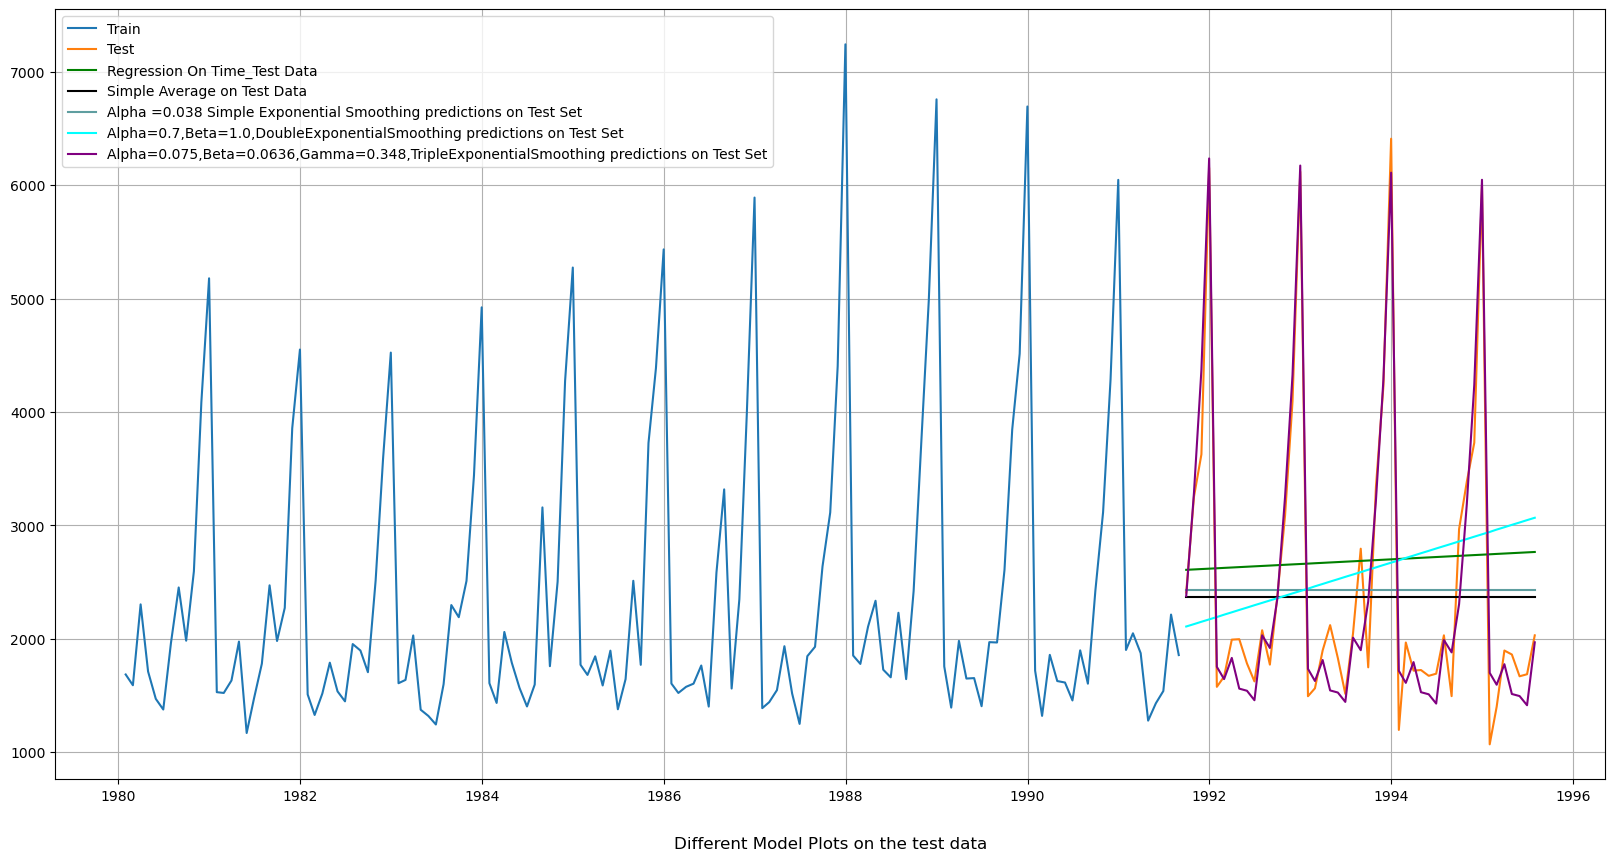

In [88]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,10))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'],label='Regression On Time_Test Data', color = 'green')

#Complete the code to plot the predictions based on the best simple average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data', color='black')


#Complete the code to plot the predictions based on the best moving average model
#plt.plot(trailing_MovingAverage_test['___________'], label='___________________________', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Alpha =0.038 Simple Exponential Smoothing predictions on Test Set', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.7000000000000002, 1.0000000000000002], label='Alpha=0.7,Beta=1.0,DoubleExponentialSmoothing predictions on Test Set', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.0636,Gamma=0.348,TripleExponentialSmoothing predictions on Test Set', color='purple')


plt.legend(loc='best')
plt.title("Different Model Plots on the test data", y=-0.1)
plt.grid();

## 1.4 Check for Stationarity

In [89]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

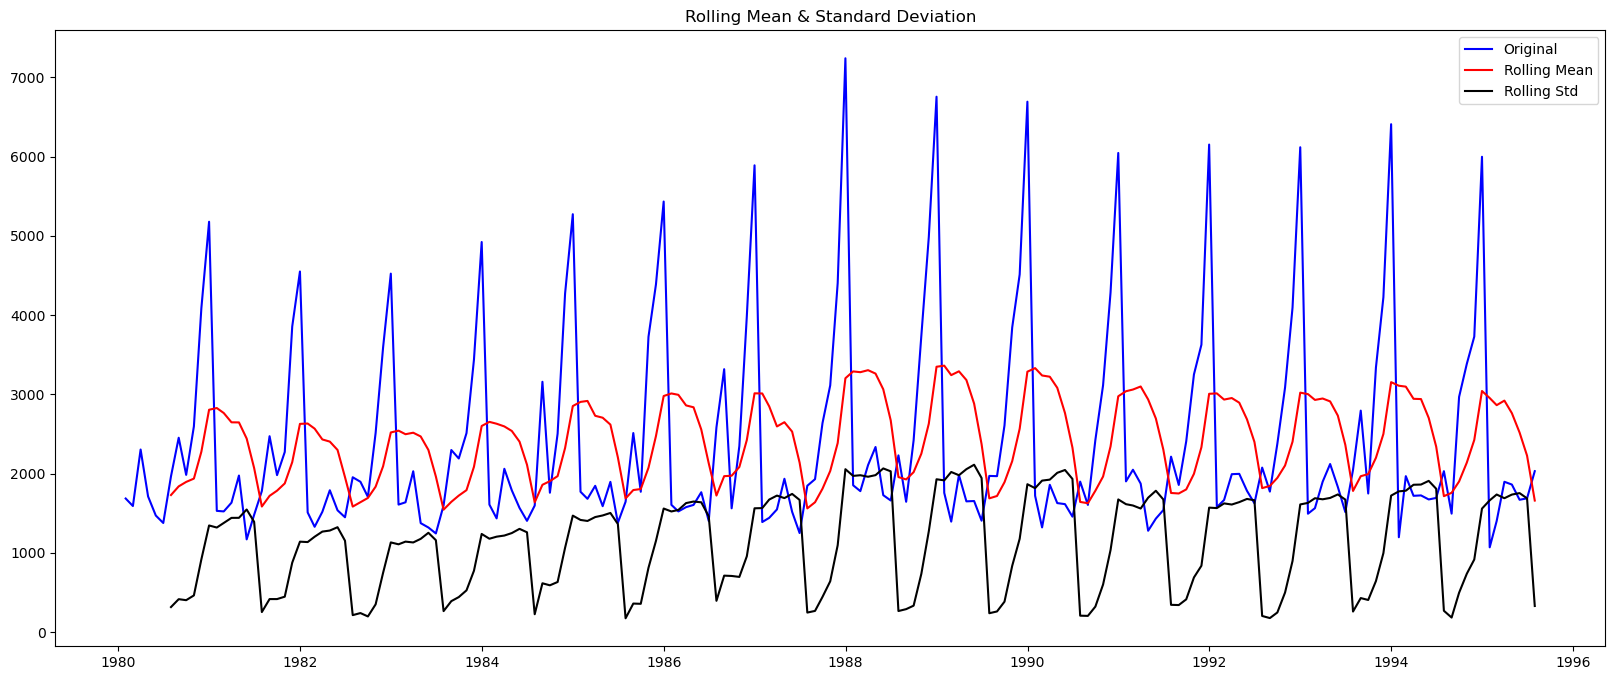

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [90]:
test_stationarity(df['Sparkling'])

### Insights:

As p > 0.05, the time series is not stationary.

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

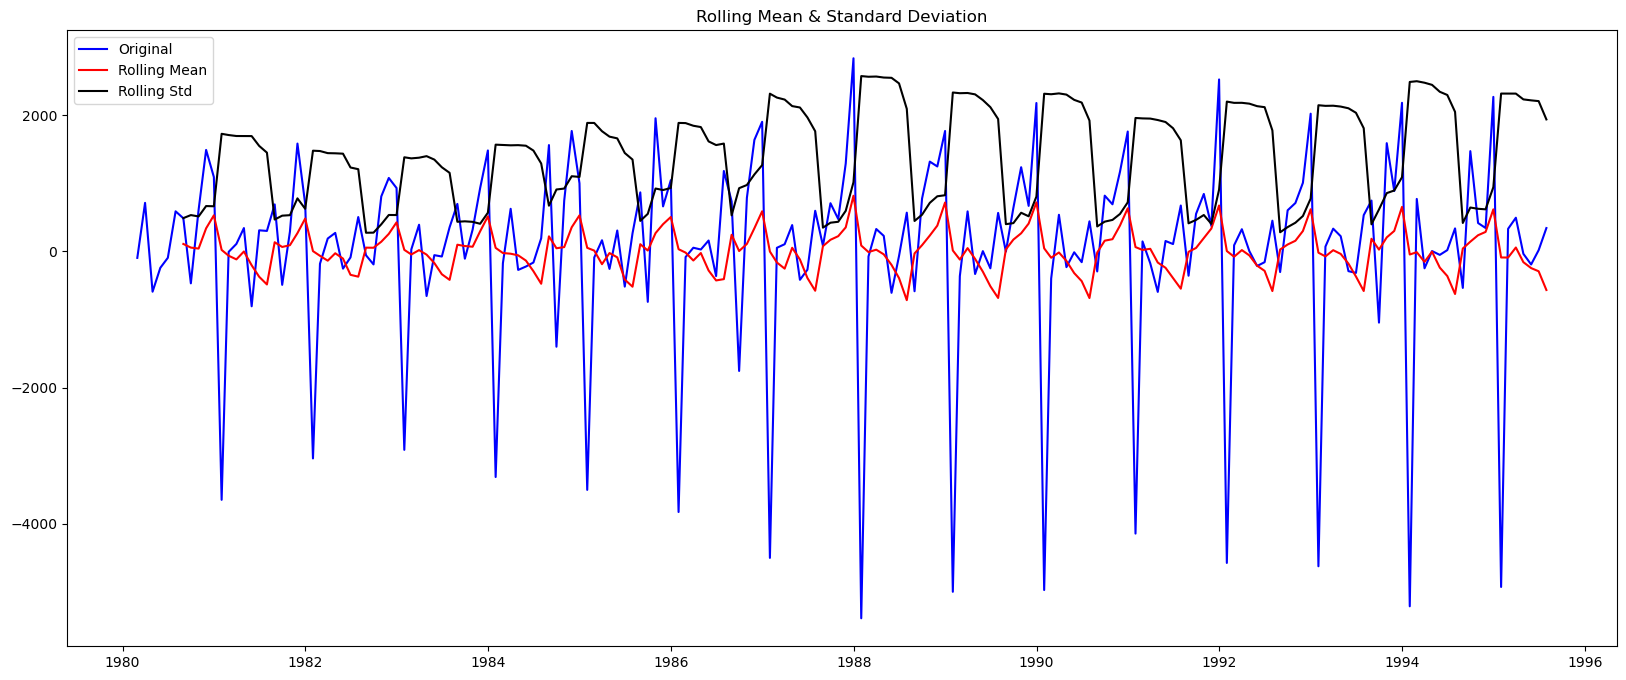

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [91]:
test_stationarity(df['Sparkling'].diff().dropna())

### Insights:

As p < 0.05, We see that after first differencing, and at  𝛼 = 0.05, the Time Series is indeed stationary.

## 1.5 Model Building - Stationary Data

## 1.5.1 - Generate ACF & PACF Plot and find the AR, MA values.

### 1.5.1.1 ACF PLOT

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

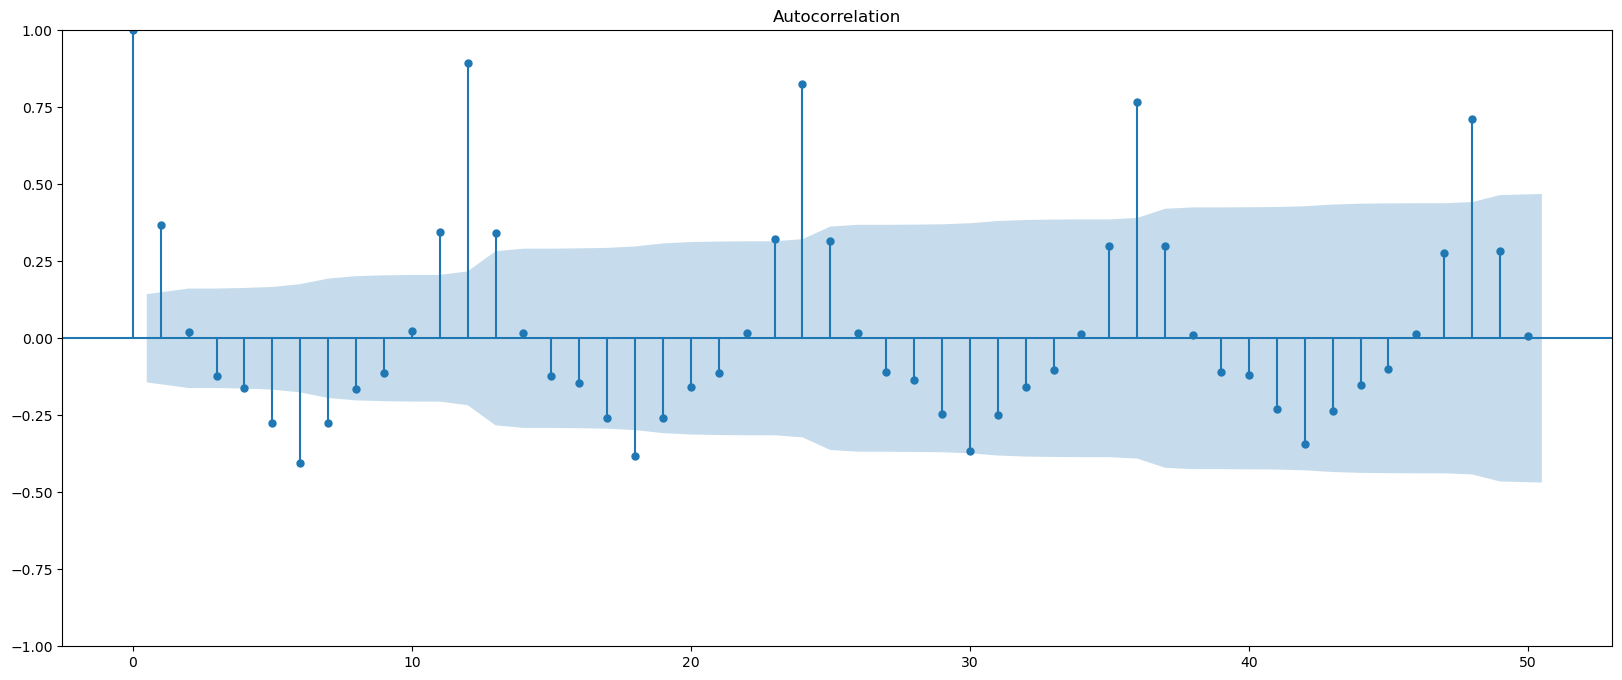

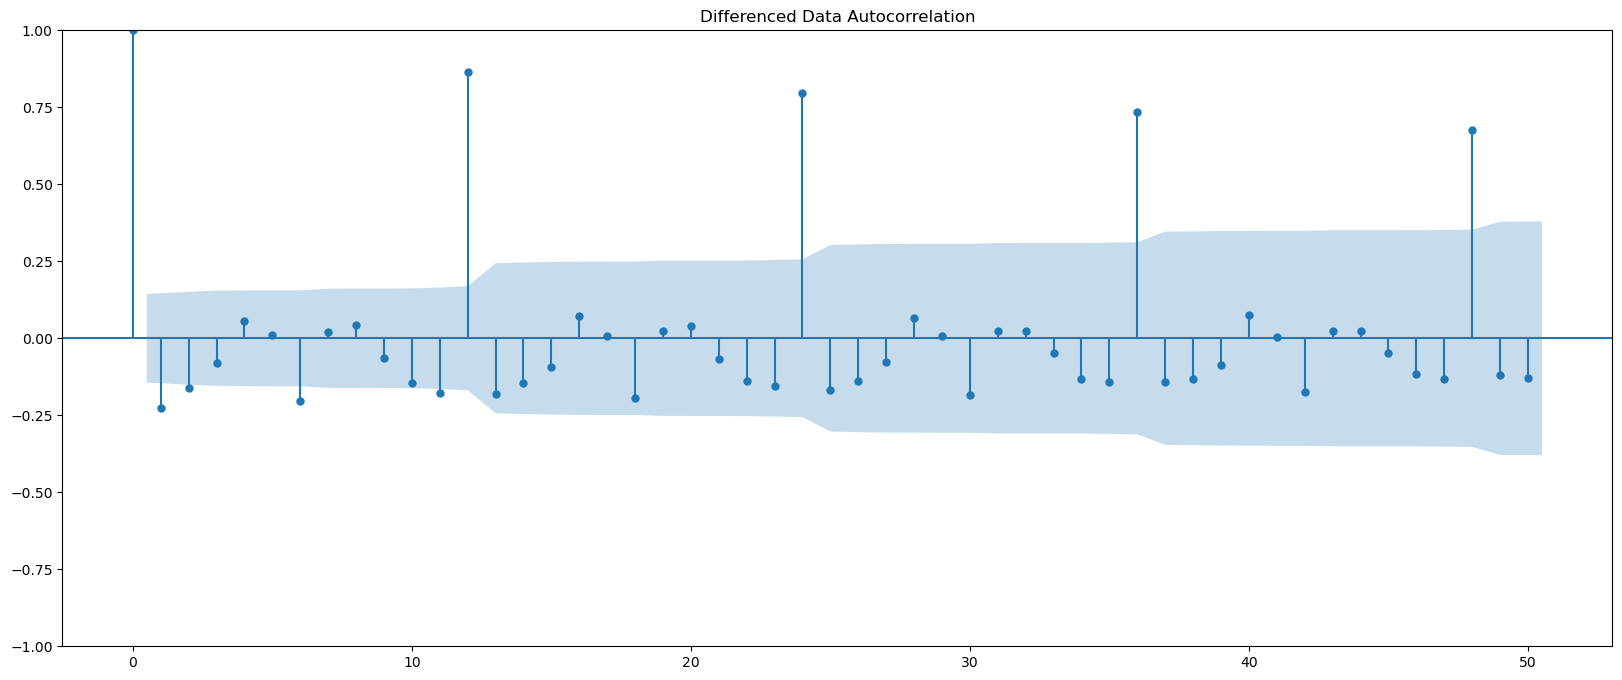

In [93]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### 1.5.2 PACF PLOT

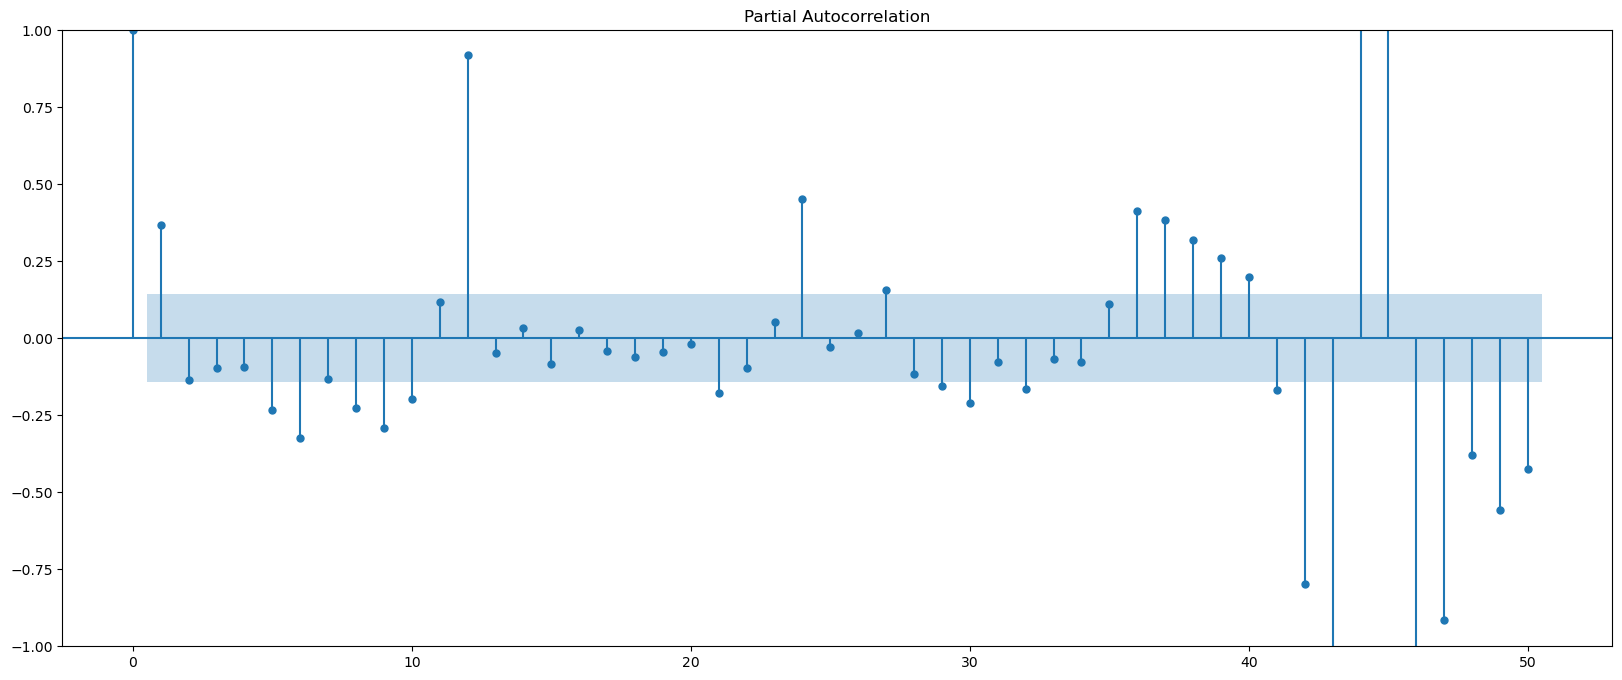

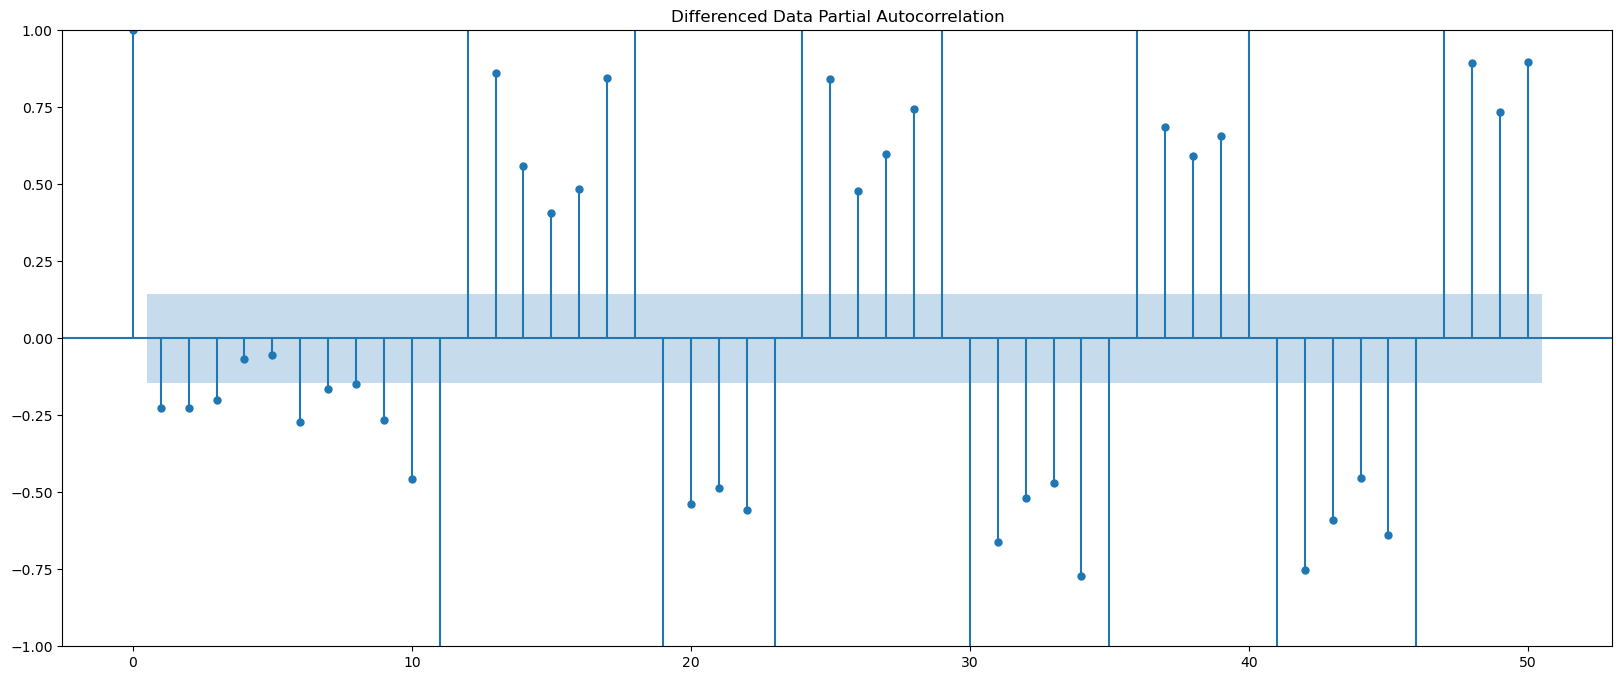

In [94]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Insights:

Everything outside the confidence interval that is, the blue band is the significance interval. 
From the differentiated ACF plot, we can get the q value for the MA model on analyzing all the spikes beyond the blue area.
Hence, q = 2.

From the differentiated PACF plot, we can get the value of p for the AR model. 
Here, p = 3 which gives the spikes outside the blue boundary of the PACF plot.

Thus, p=3, q=2 and d=1

### AR value = p = 3
### MA value = q = 2

## 1.5.2 Build different ARIMA models

### 1.5.2.1 Auto ARIMA

In [95]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [96]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [97]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2407.597117207587
ARIMA(0, 1, 1) - AIC:2400.4928944373605
ARIMA(0, 1, 2) - AIC:2366.1755184903864
ARIMA(1, 1, 0) - AIC:2405.4826254611853
ARIMA(1, 1, 1) - AIC:2367.84569493432
ARIMA(1, 1, 2) - AIC:2366.8908432891567
ARIMA(2, 1, 0) - AIC:2398.416332454428
ARIMA(2, 1, 1) - AIC:2365.962586640441
ARIMA(2, 1, 2) - AIC:2349.177549741146


In [98]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2349.177550
7  (2, 1, 1)  2365.962587
2  (0, 1, 2)  2366.175518
5  (1, 1, 2)  2366.890843
4  (1, 1, 1)  2367.845695
6  (2, 1, 0)  2398.416332
1  (0, 1, 1)  2400.492894
3  (1, 1, 0)  2405.482625
0  (0, 1, 0)  2407.597117

In [99]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  140
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1169.589
Date:                Sun, 14 Apr 2024   AIC                           2349.178
Time:                        21:41:31   BIC                           2363.850
Sample:                    01-31-1980   HQIC                          2355.140
                         - 08-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2739      0.050     25.651      0.000       1.177       1.371
ar.L2         -0.5492      0.083     -6.577      0.000      -0.713      -0.386
ma.L1         -1.9056      0.065    -29.226      0.0

In [100]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

## Predict on the test set and evaluate the auto ARIMA

In [101]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1296.2380418091125


In [102]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['AUTO ARIMA(2,1,2)'])

resultsDf

RMSE
AUTO ARIMA(2,1,2)  1296.238042

## 1.5.2.2 MANUAL ARIMA

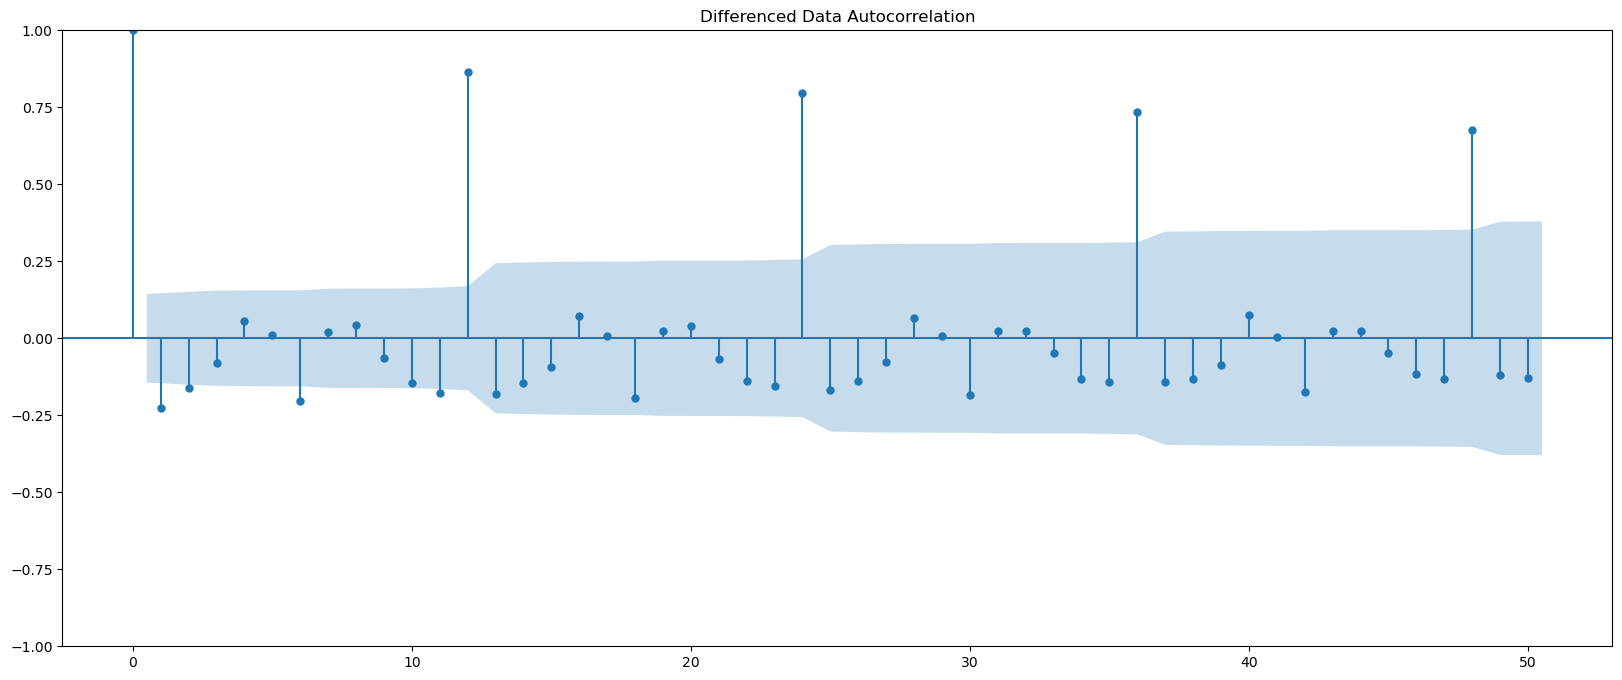

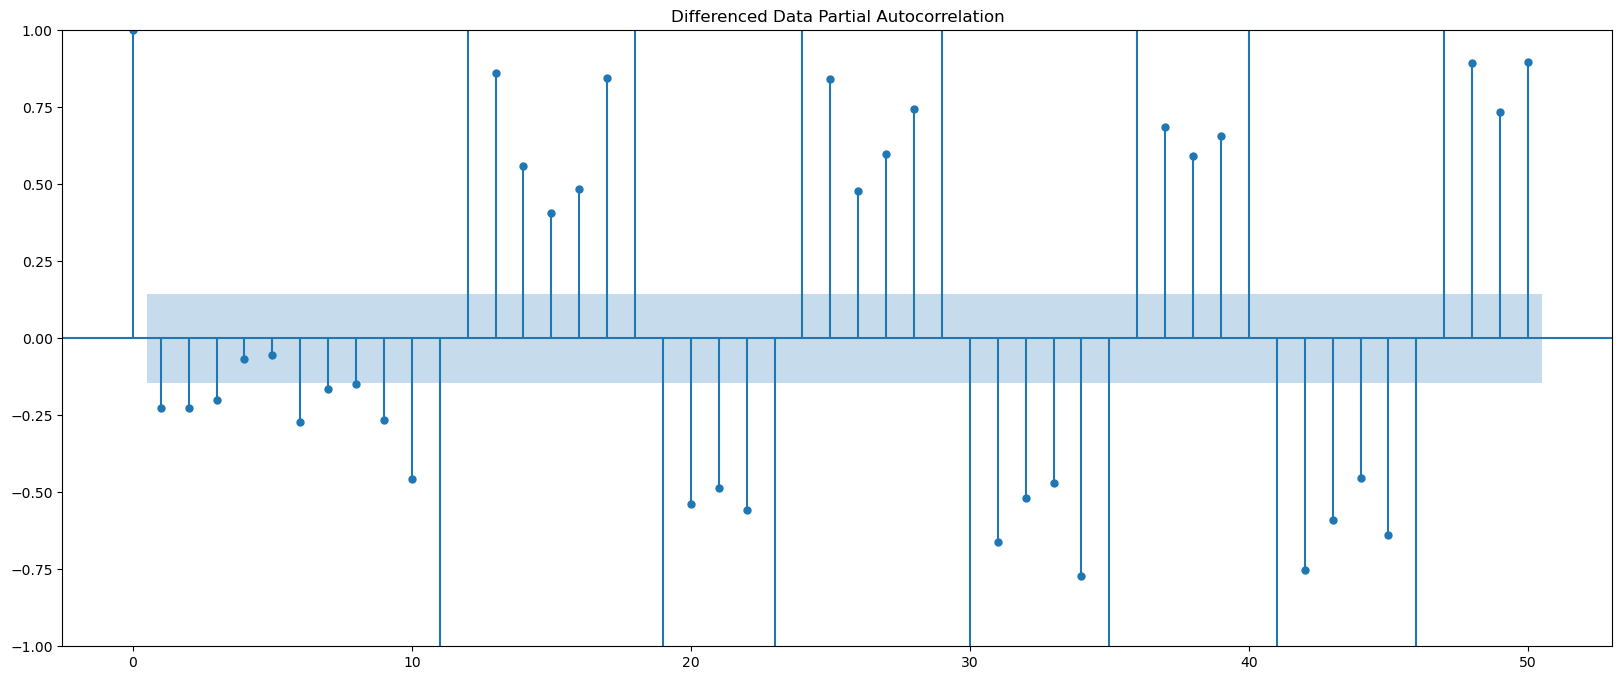

In [103]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Insights:
By looking at the above ACF and PACF plots, it is clear that p = 3 and q = 2.

In [104]:
manual_ARIMA=ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')
manual_ARIMA.initialize_approximate_diffuse()
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  140
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1176.023
Date:                Sun, 14 Apr 2024   AIC                           2364.047
Time:                        21:41:32   BIC                           2381.653
Sample:                    01-31-1980   HQIC                          2371.202
                         - 08-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4558      0.110     -4.131      0.000      -0.672      -0.240
ar.L2          0.3179      0.105      3.015      0.003       0.111       0.525
ar.L3         -0.2262      0.188     -1.203      0.2

## Predict on the Test Set using this manual ARIMA model and evaluate the model.

In [105]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

1325.7710347694842


In [106]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['MANUAL ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
AUTO ARIMA(2,1,2)    1296.238042
MANUAL ARIMA(3,1,2)  1325.771035

## 1.5.2.3 AUTO SARIMA

The best parameters with the lowest AIC (Akaike Information Criteria) are taken.

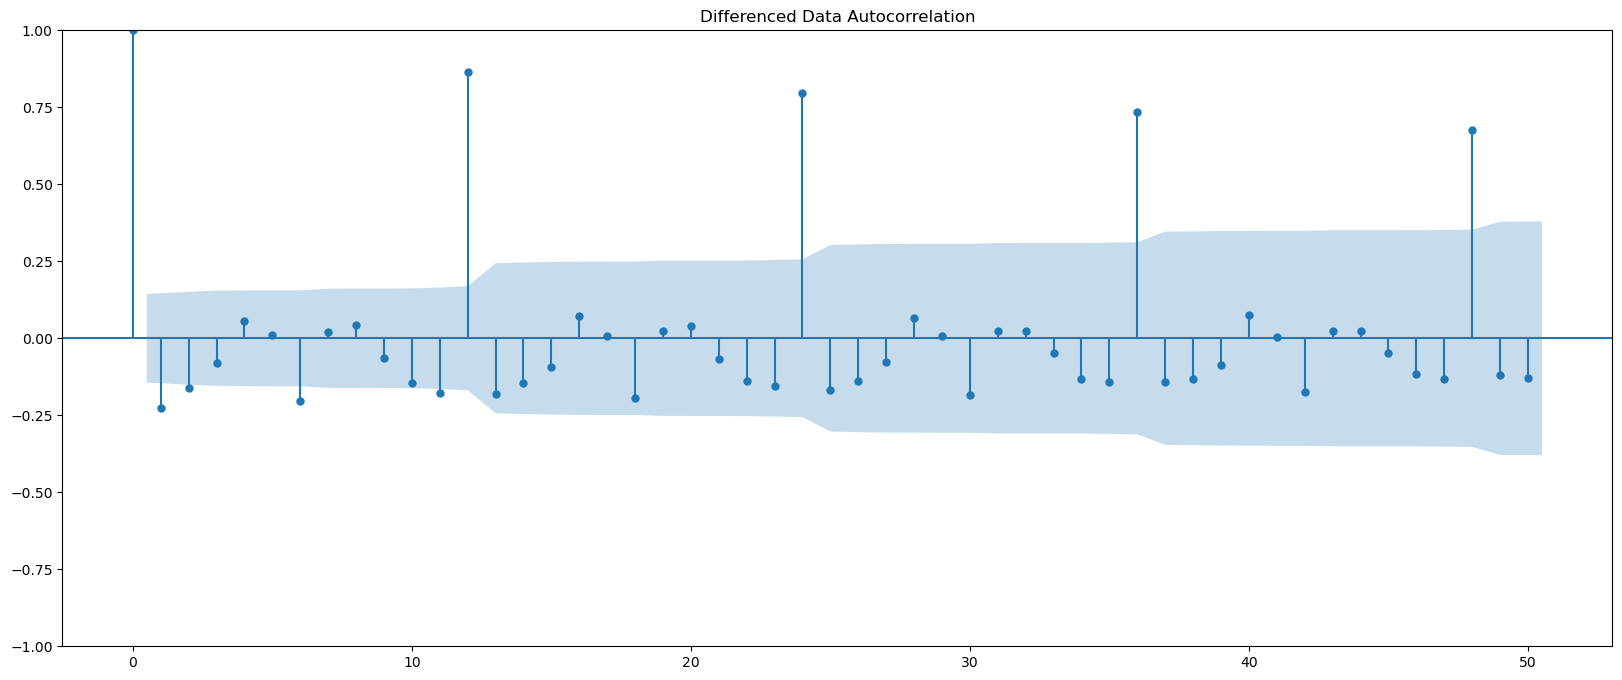

In [107]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show;

### Insights:

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality to 12.

In [108]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [110]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2391.2903848314263
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2085.132928435441
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1848.3567951668435
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1957.2937632008495
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1929.288588657241
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1753.1798744354705
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1769.3957323239326
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1769.4624079144342
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1753.7152708859587
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2367.5067669106875
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2049.454085697229
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1812.878351193702
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1913.8659786729966
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1855.9460842178796
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1687.588950659206
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1723.9180729065665
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1717.1330719918524
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1687.9702958804885
SARIMA(0, 1, 2)

In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1671.533532
53  (1, 1, 2)  (2, 0, 2, 12)  1672.185044
23  (0, 1, 2)  (1, 0, 2, 12)  1673.182782
77  (2, 1, 2)  (1, 0, 2, 12)  1673.424063
80  (2, 1, 2)  (2, 0, 2, 12)  1674.135749

In [112]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  140
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -828.767
Date:                            Sun, 14 Apr 2024   AIC                           1671.534
Time:                                    21:42:24   BIC                           1690.563
Sample:                                         0   HQIC                          1679.254
                                            - 140                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5843      0.235     -2.484      0.013      -1.045      -0.123
ma.L1         -0.1705      0.202   

### Insights:

### Jarque-Bera test states error is normal or non normal
#Null Hypothesis: Normal, Alternate Hypothesis:Non-Normal, 
p value 0.01 < 0.05 so Alternate Hypothesis is true, hence Errors are non-normal.

### Ljung-Box states Null hypothesis: no autocorrelation, Alternate hypothesis: autocorrelation
#p value of Ljung-Box test is 0.95 > 0.05 , so no autocorrelation.

## Heteroskedasticity test Null:Homo, Alternate: Hetero
#p value is 0.18 > 0.05 so Homo, pattern is not observed.

## Conclusion: Errors are not normally distributed with no autocorrelation and Heteroskedasticity(patterns) is not observed.

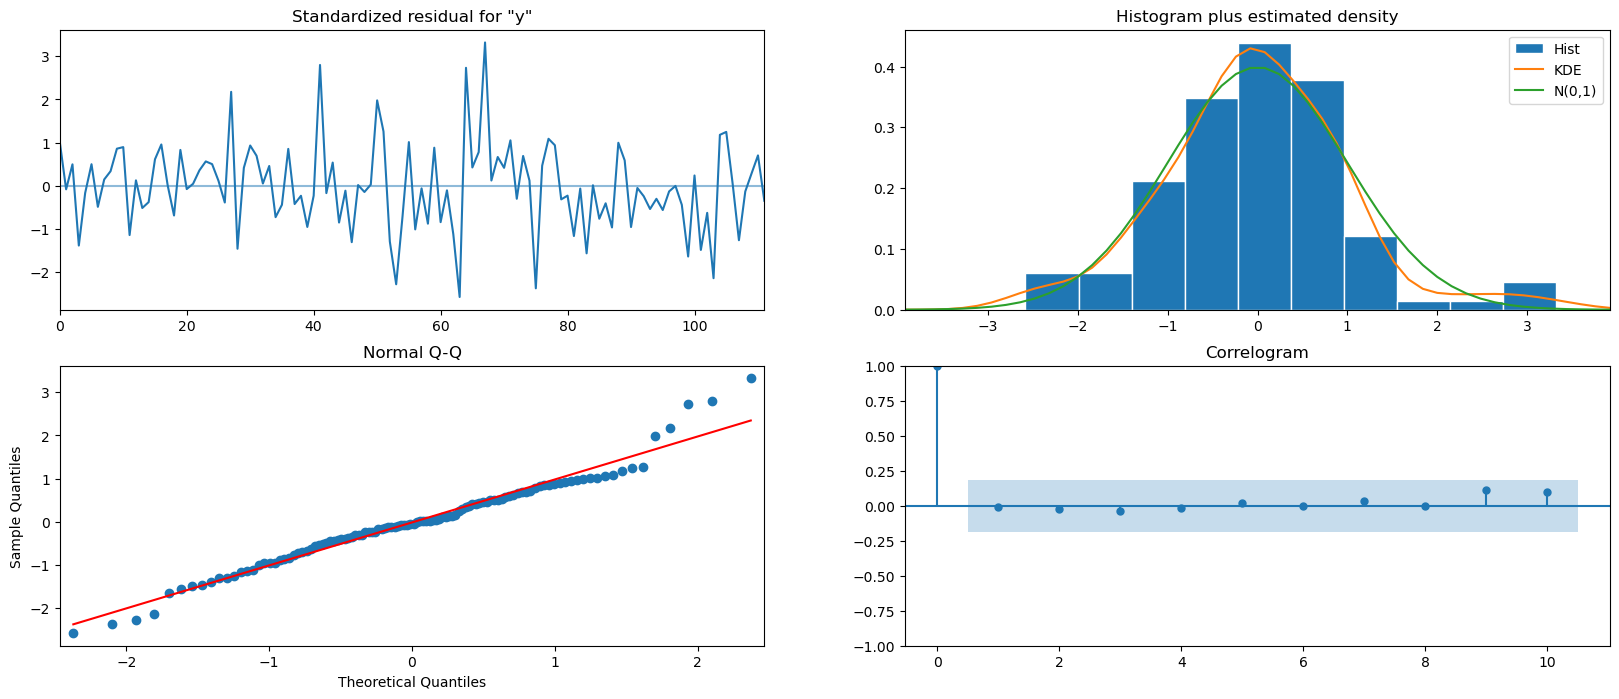

In [113]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2308.781063  383.694614    1556.753440    3060.808687
1  3360.413982  395.083540    2586.064474    4134.763491
2  4589.100298  395.655289    3813.630181    5364.570415
3  6614.650598  398.332013    5833.934199    7395.366996
4  1763.625985  398.381229     982.813124    2544.438846

In [115]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

468.23421123681794


In [116]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['AUTO SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
AUTO ARIMA(2,1,2)             1296.238042
MANUAL ARIMA(3,1,2)           1325.771035
AUTO SARIMA(1,1,2)(1,0,2,12)   468.234211

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

## 1.5.2.4 MANUAL SARIMA

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

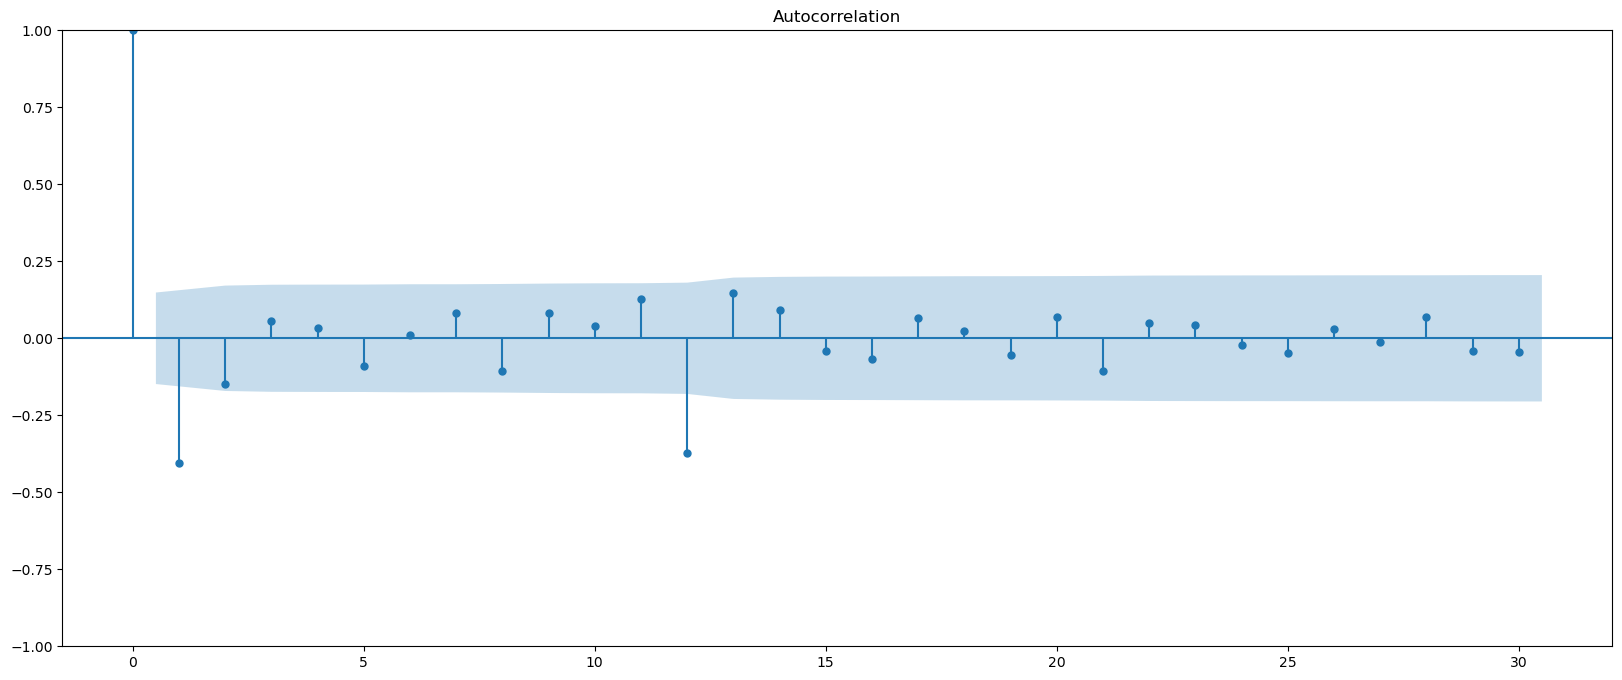

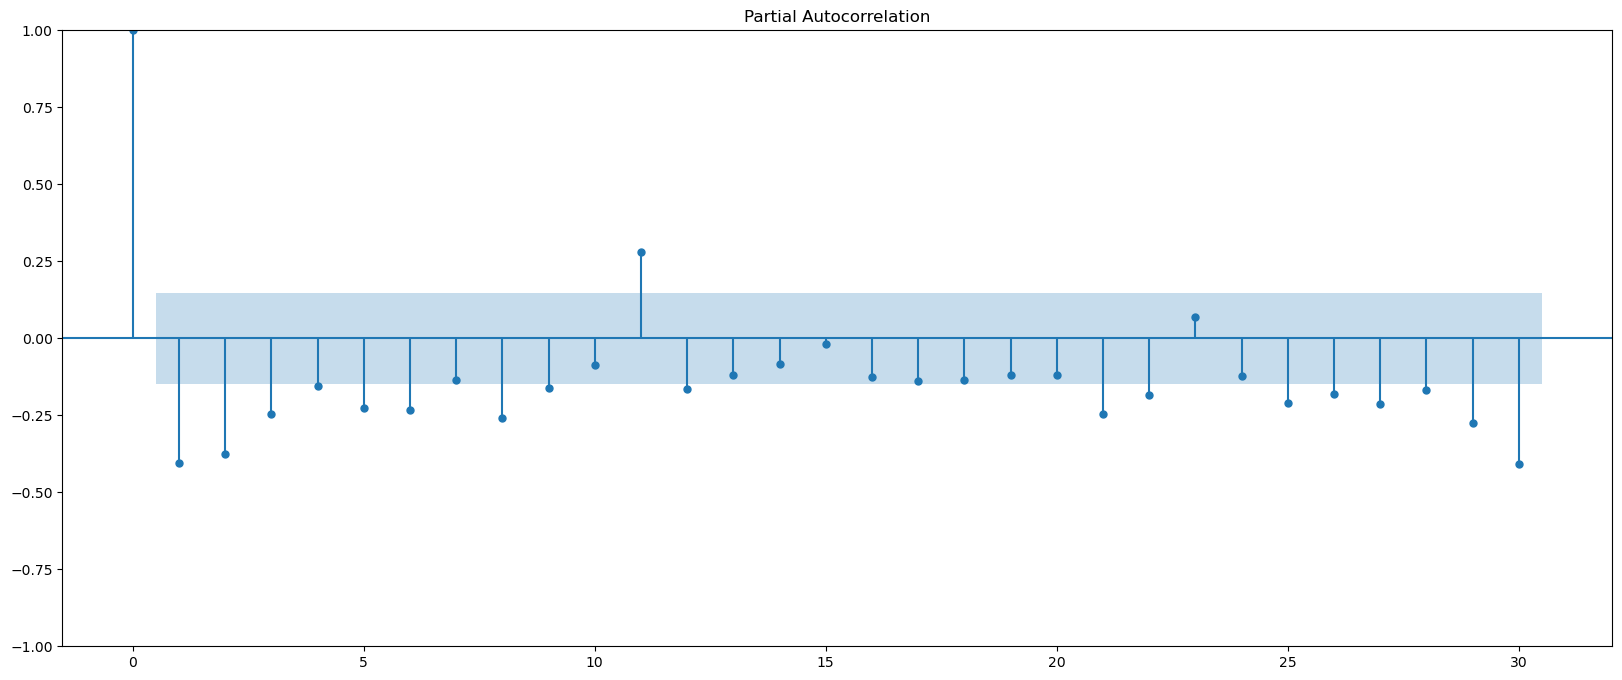

In [117]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);
plt.show()

Order of the series (p, d, q) = (3, 1, 1)
Seasonal order of the time series (P, D, Q)F = (0, 1, 0) 12


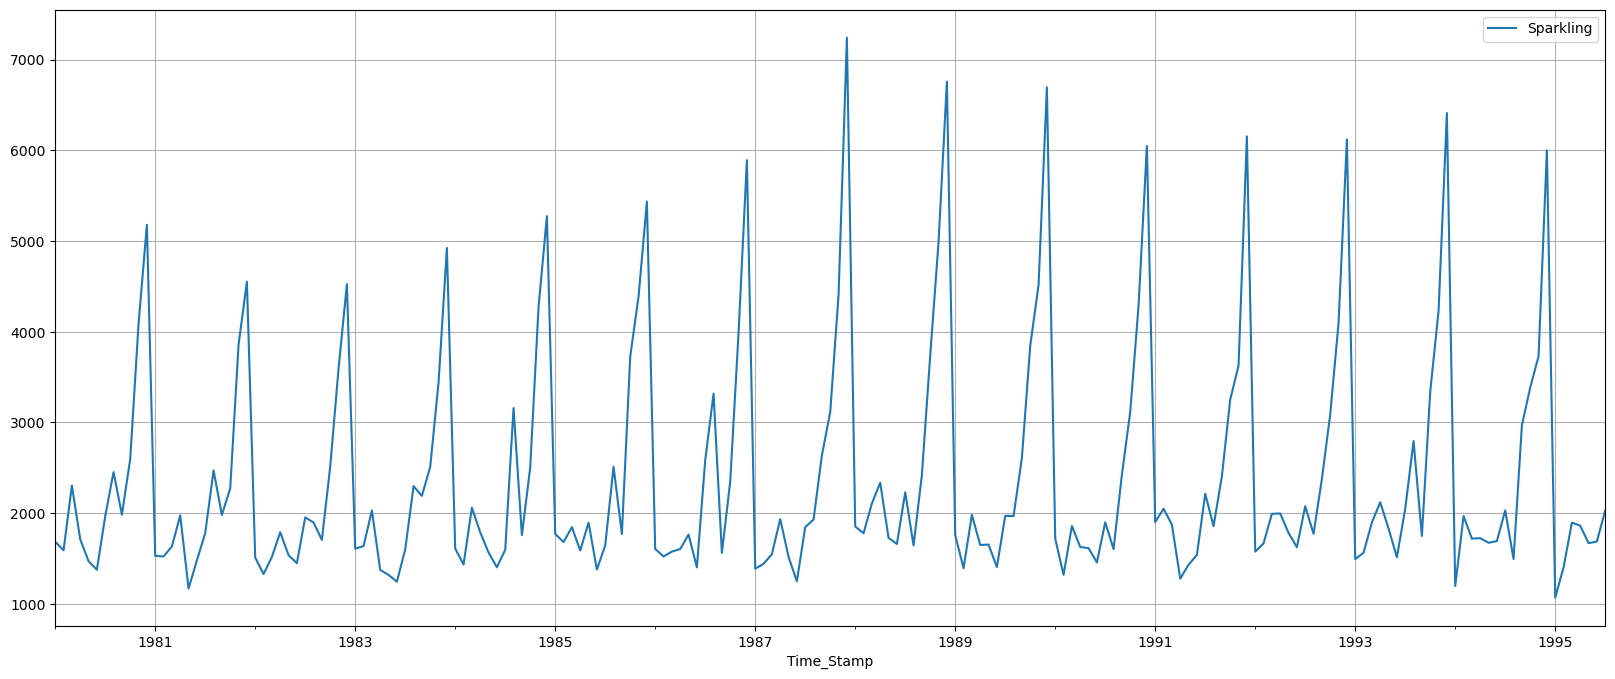

In [118]:
df.plot()
plt.grid();

As the series has seasonality, we shall take the seasonal difference.

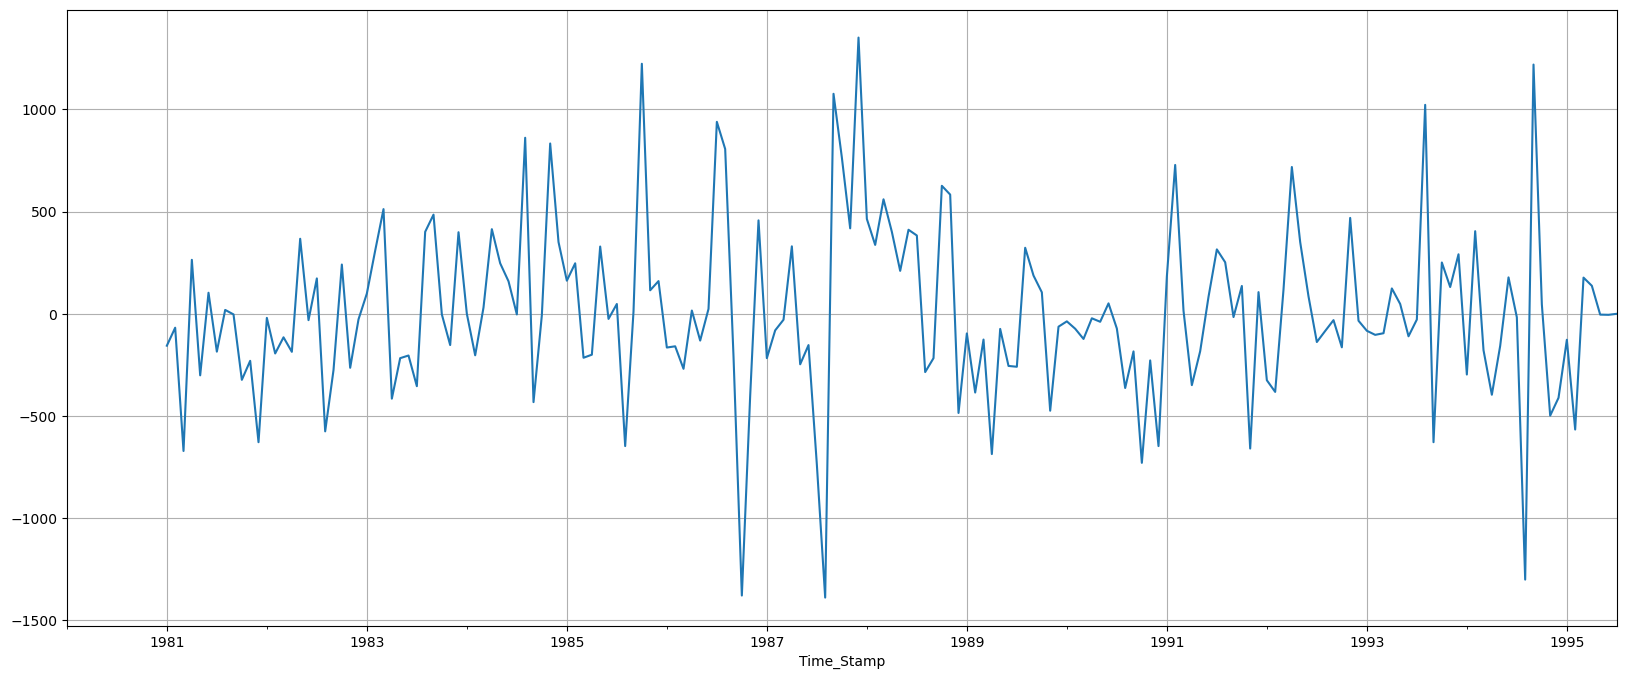

In [119]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

We see a slight trend in the time series, hence let is do first order differencing.

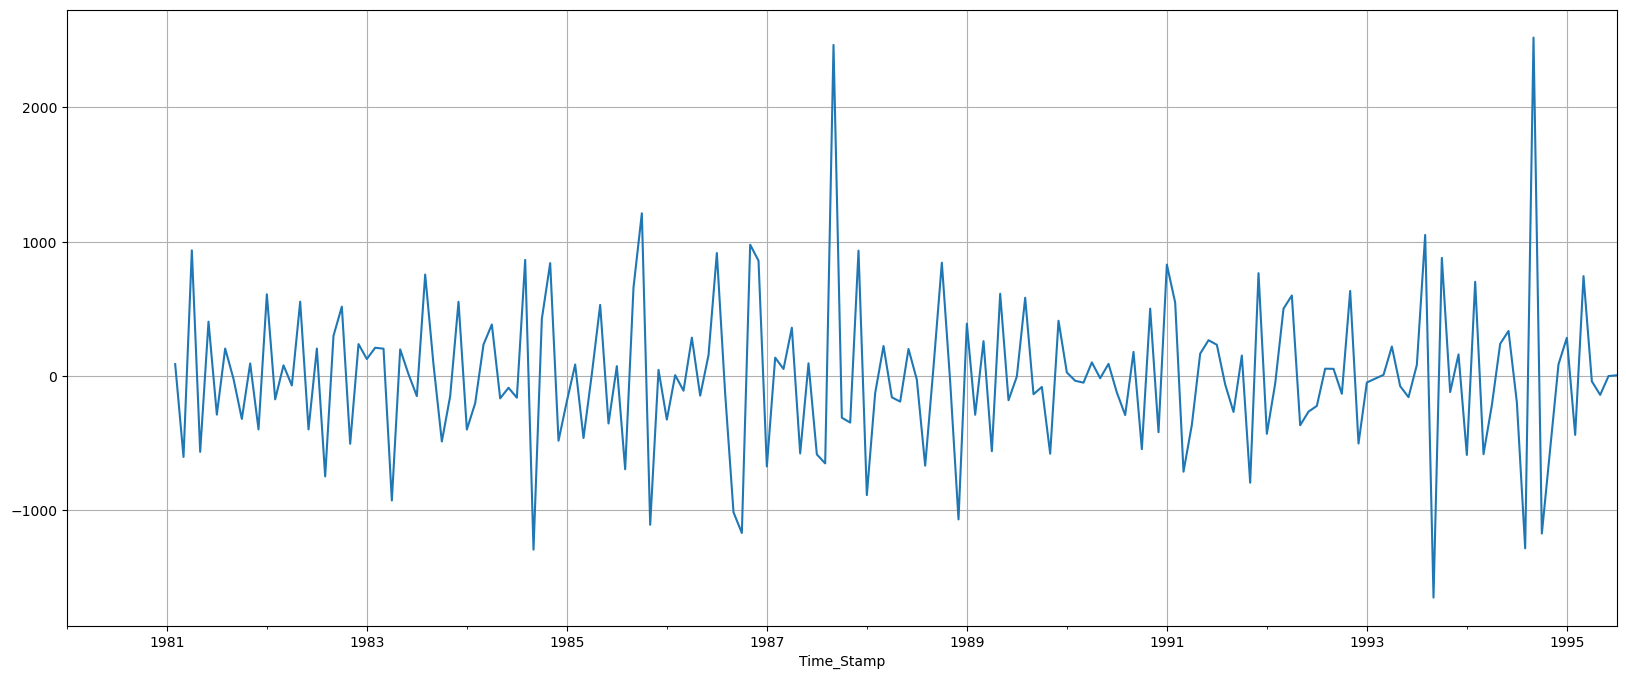

In [120]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.



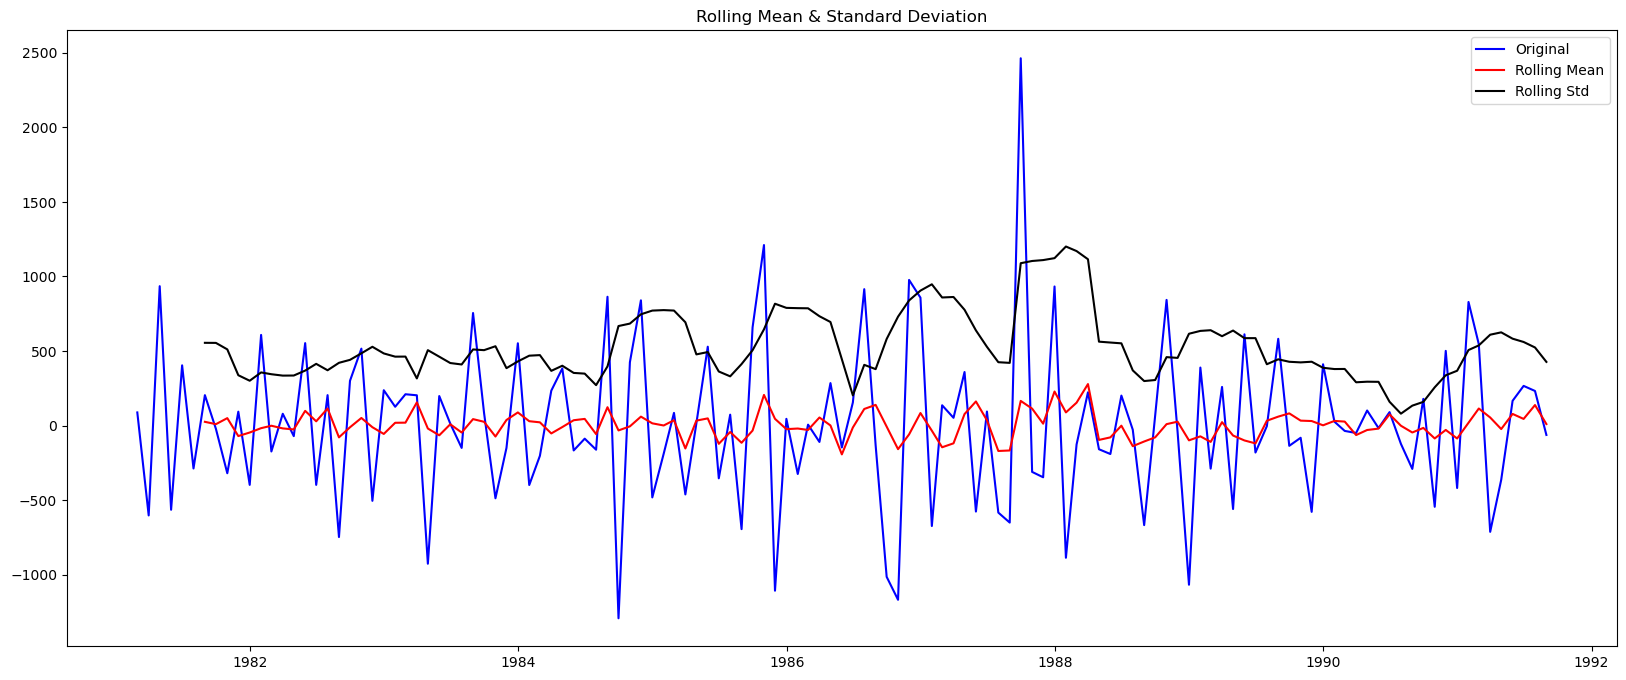

Results of Dickey-Fuller Test:
Test Statistic                  -3.567503
p-value                          0.006414
#Lags Used                      10.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64 



In [121]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

As the p-value , 0.006414 is less than 0.05, the series is stationary.

In [122]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  140
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood                -925.162
Date:                             Sun, 14 Apr 2024   AIC                           1860.323
Time:                                     21:42:27   BIC                           1874.425
Sample:                                          0   HQIC                          1866.051
                                             - 140                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2676      0.076      3.523      0.000       0.119       0.416
ar.L2         -0.1351      

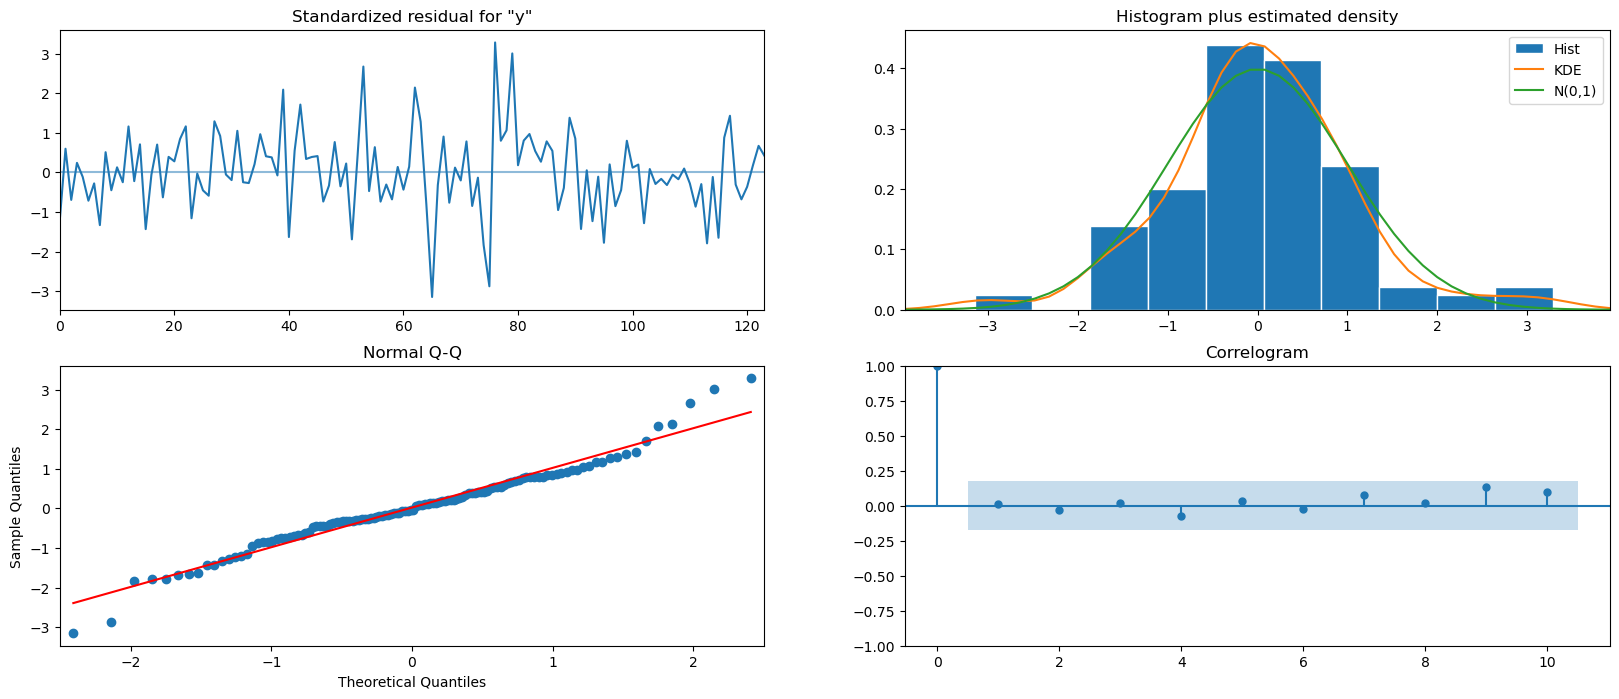

In [123]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

## Predict the model on the Test data and evaluate the model

In [124]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [125]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2471.493408  415.769343    1656.600469    3286.386347
1  3133.230283  431.226983    2288.040927    3978.419638
2  4318.433915  431.786350    3472.148219    5164.719610
3  6073.530675  431.893014    5227.035923    6920.025427
4  1922.815750  432.204399    1075.710694    2769.920806

In [126]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

407.4098335429987


## 1.5.3 Check the performance of the models built

In [127]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['MANUAL SARIMA(3,1,1)(0,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
AUTO ARIMA(2,1,2)               1296.238042
MANUAL ARIMA(3,1,2)             1325.771035
AUTO SARIMA(1,1,2)(1,0,2,12)     468.234211
MANUAL SARIMA(3,1,1)(0,1,0,12)   407.409834

## 1.6 Compare the performance of the models

## 1.6.1 Compare the performance of all the models built - Choose the best model with proper rationale 

In [128]:
resultsDf.sort_values(by=['RMSE'])

RMSE
MANUAL SARIMA(3,1,1)(0,1,0,12)   407.409834
AUTO SARIMA(1,1,2)(1,0,2,12)     468.234211
AUTO ARIMA(2,1,2)               1296.238042
MANUAL ARIMA(3,1,2)             1325.771035

### Insights:

After comparing the Root Mean Squared Errors of all the four models, namely, Manual ARIMA, Auto ARIMA, Manual SARIMA and Auto SARIMA, we see the following:

* The best model so far is the Manual SARIMA model with the order being (2,1,3) and seasonal order being (0,1,0) with seasonality of 12.
* The next best model is the Auto SARIMA model.
* The RMSE is greatly reduced once the seasonality component is also taken in the time series.

## 1.6.2 Rebuild the best model using the entire data

In [129]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1277.533
Date:                             Sun, 14 Apr 2024   AIC                           2565.067
Time:                                     21:42:28   BIC                           2580.775
Sample:                                 01-31-1980   HQIC                          2571.441
                                      - 07-31-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1200      0.057      2.112      0.035       0.009       0.231
ar.L2         -0.0865      

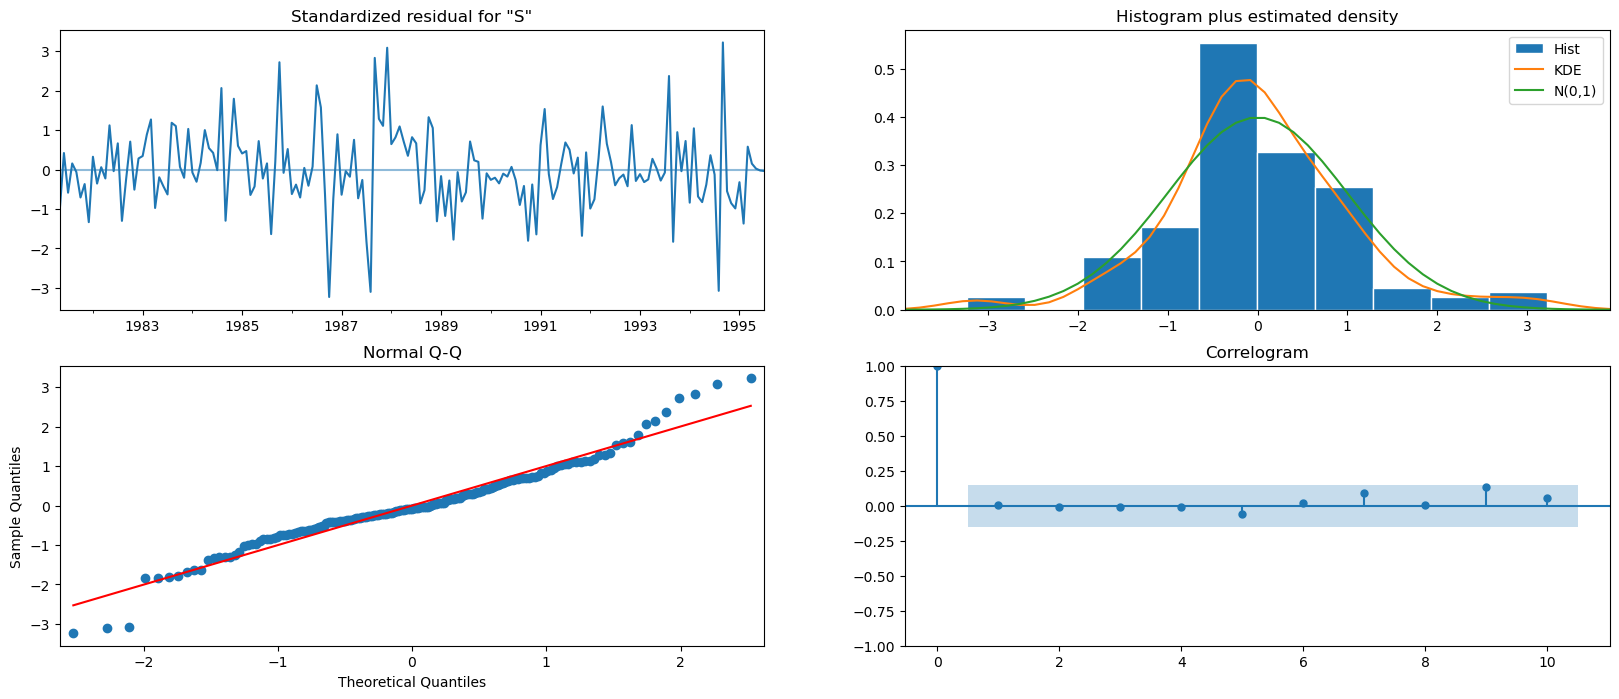

In [130]:
results_full_data_model.plot_diagnostics();

## 1.6.3 Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [131]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [132]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1504.665943  420.832618     679.849167    2329.482718
1995-09-30  2978.349590  424.133994    2147.062238    3809.636942
1995-10-31  3394.811883  425.027969    2561.772372    4227.851394
1995-11-30  3739.106890  425.210865    2905.708908    4572.504872
1995-12-31  6009.218412  425.290062    5175.665208    6842.771617

In [133]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 576.7456978265678


In [134]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

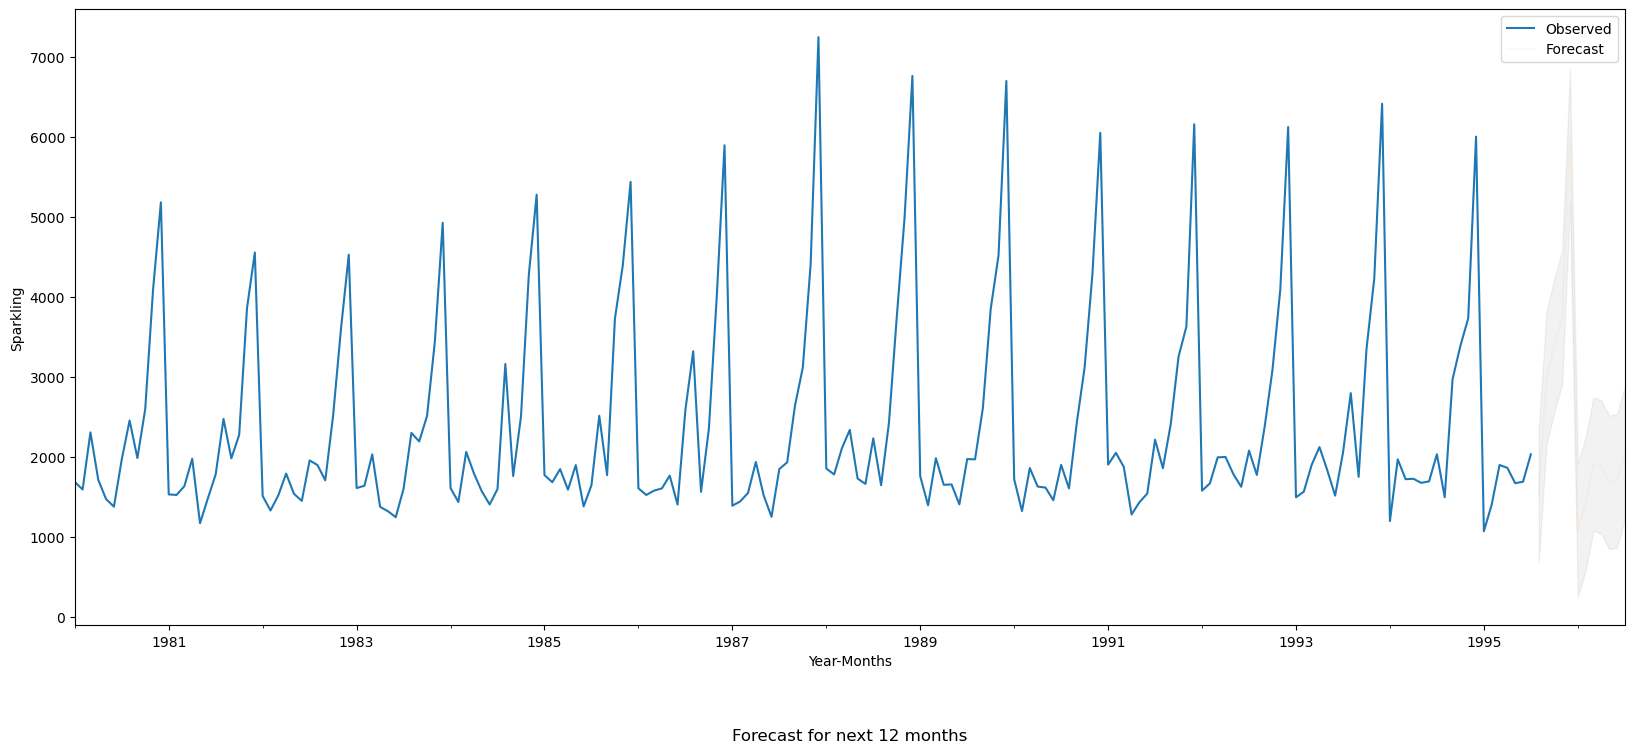

In [135]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.05)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.title("Forecast for next 12 months", y=-0.2)
plt.legend(loc='best')
plt.show()

In [136]:

predicted_manual_SARIMA_12_full_data.predicted_mean

1995-08-31    1504.665943
1995-09-30    2978.349590
1995-10-31    3394.811883
1995-11-30    3739.106890
1995-12-31    6009.218412
1996-01-31    1080.182978
1996-02-29    1412.181856
1996-03-31    1907.189617
1996-04-30    1872.189111
1996-05-31    1680.188330
1996-06-30    1698.188616
1996-07-31    2041.188696
Freq: M, Name: predicted_mean, dtype: float64

## 1.7 Actionable Insights and Recommendations

## Insights:
•	The graph of the time series data contains seasonality but no trend.
•	There are outliers in the dataset.
•	The yearly boxplot shows that the sale of Sparkling wine has decreased from 1980 to 1995. The maximum sale of wine has occured in 1988 while the minimum is in the year 1995.
•	December month across the years has the highest sales of Sparkling wine.
•	The data is right skewed as the mean is greater than median
•	Multiplicative decomposition is the type of decomposition used for the dataset as the residuals do not show any particular trend.
•	Among all the models used to model the data, Triple Exponential Smoothing is the one which is chosen with specific values of alpha, beta and gamma as this model has the lowest RMSE value.
•	The DataFrame is not stationary, hence Dicky Fuller method is used to make it stationary
•	Manual SARIMA model with seasonality 12 has the lowest RMSE value, hence it is the most preferred model. 
•	Since SARIMA takes into account the seasonality aspect, it is a more powerful model as compared to ARIMA.

## Recommendations:
•	The ABC Estate Wines company must ensure the stock availability of Sparkling type wines on a higher during the month of OCT, NOV & DEC on all years
•	Overfitting issues are possible, hence the model chosen should be tested with different hyperparameters and then moved to production.
•	SARIMA model thrives in capturing the periodic surges in demand. Hence, the business can up its supply during the peak demand periods.
•	The summer months see an average sale of Sparkling wine, hence ABC Estate Wines company can try to market their wine more during the summer months.
•	Winter season and the Christmas season is the influencing factor for the sale of wine. The ABC company can try to bring increase it further by increasing the supply of Sparkling wine.

                *******************************************************
